## Identifying Instances of Financial Excess in BPD Spending





Earnings Data analysis from 2012-2022

In [2]:
### Read in the data
import pandas as pd
import matplotlib.pyplot as plt

earnings22 = pd.read_csv('../data/Earnings/finalconsolidatedcy22earnings_feb2023.xlsx-sheet1.csv')
earnings21 = pd.read_csv('../data/Earnings/employee-earnings-report-2021.csv', encoding = 'ISO-8859-1')
earnings20 = pd.read_csv('../data/Earnings/city-of-boston-calendar-year-2020-earnings.csv', encoding = 'ISO-8859-1')
earnings19 = pd.read_csv('../data/Earnings/allemployeescy2019_feb19_20final-all.csv', encoding = 'ISO-8859-1')
earnings18 = pd.read_csv('../data/Earnings/employeeearningscy18full.csv', encoding = 'ISO-8859-1')
earnings17 = pd.read_csv('../data/Earnings/employee-earnings-report-2017.csv', encoding = 'ISO-8859-1')
earnings16 = pd.read_csv('../data/Earnings/employee-earnings-report-2016.csv', encoding = 'ISO-8859-1')
earnings15 = pd.read_csv('../data/Earnings/employee-earnings-report-2015.csv', encoding = 'ISO-8859-1')
earnings14 = pd.read_csv('../data/Earnings/employee-earnings-report-2014.csv', encoding = 'ISO-8859-1')
earnings13 = pd.read_csv('../data/Earnings/employee-earnings-report-2013.csv', encoding = 'ISO-8859-1')
earnings12 = pd.read_csv('../data/Earnings/employee-earnings-report-2012.csv', encoding = 'ISO-8859-1')

operatingBudget = pd.read_csv("../data/Operating Budget/fy24-adopted-operating-budget.csv")

pd.options.display.float_format = '{:.0f}'.format

### 2022 Employee Earnings Data

In [3]:
earnings22

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL
0,"Gavin,Donna M.",Boston Police Department,Police Lieutenant (Det),"53,226.90",NaN,"1,045,845.44",463.52,NaN,NaN,"12,812.39","1,112,348.25",02186
1,"Cassellius,Brenda",Superintendent,Superintendent,"179,109.61",NaN,"417,839.83",NaN,NaN,NaN,NaN,"596,949.44",55419
2,"Dempsey,John",Boston Fire Department,Commissioner (BFD),"133,653.78",NaN,"312,752.53",NaN,NaN,NaN,NaN,"446,406.31",02152
3,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),"145,775.26",NaN,"13,932.92","196,515.25",NaN,"11,880.00","29,155.26","397,258.69",02052
4,"Smith,Sean P",Boston Police Department,Police Lieutenant,"142,535.62",NaN,"18,827.45","142,692.38",NaN,"46,365.00","35,633.88","386,054.33",02186
...,...,...,...,...,...,...,...,...,...,...,...,...
23199,"wheeler,Stephen clifford",Boston Cntr - Youth & Families,Lifeguard I,42.01,NaN,NaN,NaN,NaN,NaN,NaN,42.01,02129
23200,"Harris,Gloria",BPS Office Of Budget Mgmt,Attendant,24.23,NaN,NaN,NaN,NaN,NaN,NaN,24.23,02136
23201,"Jackson,Wanita Tina",Boston Police Department,School Traffic Supv,23.68,NaN,NaN,NaN,NaN,NaN,NaN,23.68,02119
23202,"Paul,Desmond",BPS Substitute Teachers/Nurs,Substitute Teacher HE,21.28,NaN,NaN,NaN,NaN,NaN,NaN,21.28,02119


In [4]:
earnings22['TOTAL_ GROSS'] = earnings22['TOTAL_ GROSS'].str.replace(',', '', regex=True).astype(float)
earnings22['QUINN_EDUCATION'] = earnings22['QUINN_EDUCATION'].str.replace(',', '', regex=True).astype(float)
earnings22['REGULAR'] = earnings22['REGULAR'].str.replace(',', '', regex=True).astype(float)
earnings22['OTHER'] = earnings22['OTHER'].str.replace(',', '', regex=True).astype(float)
earnings22['OVERTIME'] = earnings22['OVERTIME'].str.replace(',', '', regex=True).astype(float)
earnings22['INJURED'] = earnings22['INJURED'].str.replace(',', '', regex=True).astype(float)
earnings22['DETAIL'] = earnings22['DETAIL'].str.replace(',', '', regex=True).astype(float)
earnings22['RETRO'] = earnings22['RETRO'].str.replace(',', '', regex=True).astype(float)

In [5]:
departments2022 = earnings22.groupby('DEPARTMENT_NAME')['TOTAL_ GROSS'].mean()

departments2022 = departments2022.sort_values(ascending= False )
departments2022
departments2022 = departments2022.head(10)


In [6]:
earnings22df = earnings22[earnings22['DEPARTMENT_NAME'].str.contains('Boston Police Department')]

total2022Earnings = earnings22df['TOTAL_ GROSS'].sum()
total2022Quinn = earnings22df['QUINN_EDUCATION'].sum()
total2022Regular = earnings22df['REGULAR'].sum()
total2022Other = earnings22df['OTHER'].sum()
total2022Overtime= earnings22df['OVERTIME'].sum()
total2022Injured = earnings22df['INJURED'].sum()
total2022Detail = earnings22df['DETAIL'].sum()
total2022Retro = earnings22df['RETRO'].sum()


print("The Total for Quinn Educational: " + str(total2022Quinn))
print("The Total for Regular Pay: " + str(total2022Regular))
print("The Total for Other Pay: " + str(total2022Other))
print("The Total for Overtime: " + str(total2022Overtime))
print("The Total for Injured: " + str(total2022Injured))
print("The Total for Detail: " + str(total2022Detail))
print("The Total for Retro: " + str(total2022Retro))

#Sanity Check
print("Total Combined: " + str(total2022Other + total2022Quinn + total2022Overtime + total2022Injured + total2022Regular + total2022Detail + total2022Retro))
print("The Total Earnings made by police officers: " + str(total2022Earnings))


The Total for Quinn Educational: 28060018.53
The Total for Regular Pay: 233841180.83
The Total for Other Pay: 18060413.4
The Total for Overtime: 78265402.51
The Total for Injured: 23628467.04
The Total for Detail: 23280403.0
The Total for Retro: 687174.5
Total Combined: 405823059.81
The Total Earnings made by police officers: 405823059.81


In [7]:
percent2022Quinn = (total2022Quinn / total2022Earnings) * 100
percent2022Regular = (total2022Regular / total2022Earnings) * 100
percent2022Other = (total2022Other / total2022Earnings) * 100
percent2022Overtime =(total2022Overtime / total2022Earnings) *100
percent2022Injured = (total2022Injured / total2022Earnings) * 100
percent2022Detail = (total2022Detail / total2022Earnings) * 100
percent2022Retro = (total2022Retro / total2022Earnings) * 100

print(percent2022Quinn)
print(percent2022Detail)
print(percent2022Injured)
print(percent2022Regular)
print(percent2022Overtime)
print(percent2022Retro)
print(percent2022Other)

6.914347977943211
5.7365894907252235
5.822356928426512
57.621462156310386
19.2855976559446
0.16932859860692104
4.450317192043153


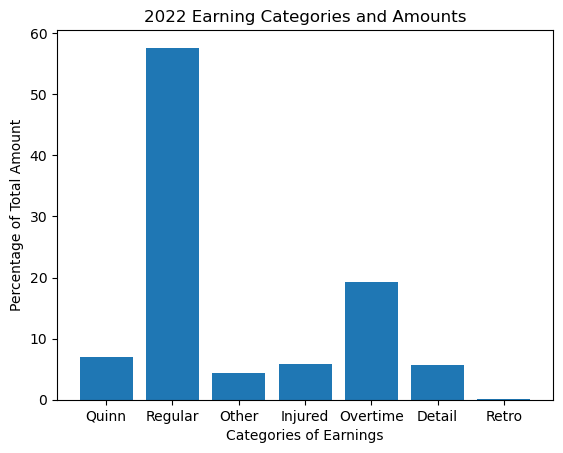

In [8]:
categories = ['Quinn', 'Regular', 'Other', 'Injured', 'Overtime', 'Detail', 'Retro']
values = [percent2022Quinn, percent2022Regular, percent2022Other, percent2022Injured, percent2022Overtime, percent2022Detail, percent2022Retro]
chart2022 = plt.bar(categories, values)
plt.xlabel('Categories of Earnings')
plt.ylabel('Percentage of Total Amount')
plt.title('2022 Earning Categories and Amounts')
plt.show()

In [9]:
numPeople22 = len(earnings22df)
num2022Injury= (earnings22df['INJURED'].notna().sum()) / numPeople22
num2022Overtime= (earnings22df['OVERTIME'].notna().sum()) / numPeople22
num2022Quinn= (earnings22df['QUINN_EDUCATION'].notna().sum() )/ numPeople22
num2022Other= (earnings22df['OTHER'].notna().sum()) / numPeople22
num2022Retro=(earnings22df['RETRO'].notna().sum() )/ numPeople22
num2022Detail= (earnings22df['DETAIL'].notna().sum()) / numPeople22


### 2021 Earnings Data

In [10]:
earnings21

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION_INCENTIVE,TOTAL_GROSS,POSTAL
0,"Beckers,Richard",Boston Police Department,Police Officer,NaN,NaN,"1,264,843.63",NaN,NaN,NaN,NaN,"1,264,843.63",02119
1,"McGowan,Jacqueline M.",Boston Police Department,Police Officer,NaN,NaN,"1,252,990.81",NaN,NaN,NaN,NaN,"1,252,990.81",02129
2,"Harris,Shawn N",Boston Police Department,Police Offc Comm Serv Offc 3$8,"69,772.10",NaN,"212,739.48","82,300.87","30,939.24","12,144.00","25,178.06","433,073.75",02130
3,"Washington,Walter",Boston Police Department,Police Officer,"100,963.38",NaN,"211,900.28","67,849.66",NaN,"9,016.00","10,096.55","399,825.87",02368
4,"Mosley Jr.,Curtis",Boston Police Department,Police Offc Comm Serv Offc 3$8,"109,858.02",NaN,"192,097.54","75,938.65",NaN,"19,550.00",NaN,"397,444.21",02301
...,...,...,...,...,...,...,...,...,...,...,...,...
22547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
earnings21['TOTAL_GROSS'] = earnings21['TOTAL_GROSS'].str.replace(',', '', regex=True).astype(float)
earnings21['QUINN_EDUCATION_INCENTIVE'] = earnings21['QUINN_EDUCATION_INCENTIVE'].str.replace(',', '', regex=True).astype(float)
earnings21['REGULAR'] = earnings21['REGULAR'].str.replace(',', '', regex=True).astype(float)
earnings21['OTHER'] = earnings21['OTHER'].str.replace(',', '', regex=True).astype(float)
earnings21['OVERTIME'] = earnings21['OVERTIME'].str.replace(',', '', regex=True).astype(float)
earnings21['INJURED'] = earnings21['INJURED'].str.replace(',', '', regex=True).astype(float)
earnings21['DETAIL'] = earnings21['DETAIL'].str.replace(',', '', regex=True).astype(float)
earnings21['RETRO'] = earnings21['RETRO'].str.replace(',', '', regex=True).astype(float)

In [12]:
departments2021 = earnings21.groupby('DEPARTMENT_NAME')['TOTAL_GROSS'].mean()
departments2021 = departments2021.sort_values(ascending= False )
departments2021 = departments2021.head(10)

In [13]:
earnings21df = earnings21.dropna(subset=['DEPARTMENT_NAME'])
earnings21df =  earnings21df[earnings21df['DEPARTMENT_NAME'].str.contains('Boston Police Department')]

total2021Earnings = earnings21df['TOTAL_GROSS'].sum()
total2021Quinn = earnings21df['QUINN_EDUCATION_INCENTIVE'].sum()
total2021Regular = earnings21df['REGULAR'].sum()
total2021Other = earnings21df['OTHER'].sum()
total2021Overtime= earnings21df['OVERTIME'].sum()
total2021Injured = earnings21df['INJURED'].sum()
total2021Detail = earnings21df['DETAIL'].sum()
total2021Retro = earnings21df['RETRO'].sum()


print("The Total for Quinn Educational: " + str(total2021Quinn))
print("The Total for Regular Pay: " + str(total2021Regular))
print("The Total for Other Pay: " + str(total2021Other))
print("The Total for Overtime: " + str(total2021Overtime))
print("The Total for Injured: " + str(total2021Injured))
print("The Total for Detail: " + str(total2021Detail))
print("The Total for Retro: " + str(total2021Retro))


#Sanity Check
print("Total Combined: " + str(total2021Other + total2021Quinn + total2021Overtime + total2021Injured + total2021Regular + total2021Detail + total2021Retro))
print("The Total Earnings made by police officers: " + str(total2021Earnings))

The Total for Quinn Educational: 28534332.54
The Total for Regular Pay: 235415152.70999998
The Total for Other Pay: 21009292.049999997
The Total for Overtime: 72222785.03
The Total for Injured: 26994382.02
The Total for Detail: 24586525.0
The Total for Retro: 0.0
Total Combined: 408762469.35
The Total Earnings made by police officers: 408762469.35


In [14]:
percent2021Quinn = (total2021Quinn / total2021Earnings) * 100
percent2021Regular = (total2021Regular / total2021Earnings) * 100
percent2021Other = (total2021Other / total2021Earnings) * 100
percent2021Overtime =(total2021Overtime / total2021Earnings) *100
percent2021Injured = (total2021Injured / total2021Earnings) * 100
percent2021Detail = (total2021Detail / total2021Earnings) * 100
percent2021Retro = (total2022Retro / total2022Earnings) * 100

print(percent2021Quinn)
print(percent2021Detail)
print(percent2021Injured)
print(percent2021Regular)
print(percent2021Overtime)
print(percent2021Retro)
print(percent2021Other)

6.9806635098800305
6.014868497858094
6.603928697985785
57.59216424256097
17.668643881334354
0.16932859860692104
5.139731170380746


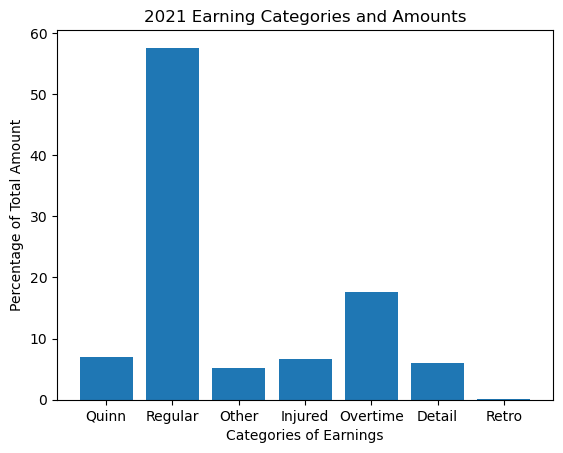

In [15]:
categories = ['Quinn', 'Regular', 'Other', 'Injured', 'Overtime', 'Detail', 'Retro']
values = [percent2021Quinn, percent2021Regular, percent2021Other, percent2021Injured, percent2021Overtime, percent2021Detail, percent2021Retro]
chart2021 = plt.bar(categories, values)
plt.xlabel('Categories of Earnings')
plt.ylabel('Percentage of Total Amount')
plt.title('2021 Earning Categories and Amounts')
plt.show()

In [16]:
numPeople21 = len(earnings21df)
num2021Injury= (earnings21df['INJURED'].notna().sum())/numPeople21
num2021Overtime= (earnings21df['OVERTIME'].notna().sum())/numPeople21
num2021Quinn= (earnings21df['QUINN_EDUCATION_INCENTIVE'].notna().sum())/numPeople21
num2021Other= (earnings21df['OTHER'].notna().sum())/numPeople21
num2021Retro= (earnings21df['RETRO'].notna().sum())/numPeople21
num2021Detail=(earnings21df['DETAIL'].notna().sum())/numPeople21

### 2020 Earnings Data

In [17]:
earnings20

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN / EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Smith,Sean P",Boston Police Department,Police Lieutenant,"$145,787.56",NaN,"$13,160.94","$124,395.57",NaN,"$45,210.00","$36,447.09","$365,001.16",02186
1,"Lee,Waiman",Boston Police Department,Police Detective,"$108,803.25",NaN,"$16,324.27","$96,126.59",NaN,"$111,688.00","$27,200.78","$360,142.89",02134
2,"Brown,John M",Boston Police Department,Police Sergeant (Det),"$132,699.44",NaN,"$19,672.83","$155,123.11",NaN,"$5,088.00","$33,175.06","$345,758.44",02136
3,"Danilecki,John H",Boston Police Department,Police Captain,"$162,770.15",NaN,"$24,504.13","$64,326.60","$3,548.13","$43,200.00","$41,579.47","$339,928.48",02081
4,"Barrett,Thomas E.",Boston Police Department,Police Sergeant (Det),"$132,699.44",NaN,"$16,723.95","$156,754.23",NaN,NaN,"$33,175.06","$339,352.68",02132
...,...,...,...,...,...,...,...,...,...,...,...,...
21853,"Homan,Paul A",BPS Substitute Teachers/Nurs,Substitute Teacher,$1.52,NaN,NaN,NaN,NaN,NaN,NaN,$1.52,02188
21854,"Lane,Cheryl A",BPS Substitute Teachers/Nurs,Sub Teacher - Retiree,$0.38,NaN,NaN,NaN,NaN,NaN,NaN,$0.38,02346
21855,"Cura,Miguel",BPS Substitute Teachers/Nurs,Substitute Teacher HE,$0.38,NaN,NaN,NaN,NaN,NaN,NaN,$0.38,02067
21856,"Nelson,Philip F",BPS Substitute Teachers/Nurs,Substitute Teacher HE,$0.38,NaN,NaN,NaN,NaN,NaN,NaN,$0.38,02132


In [18]:
earnings20[' TOTAL EARNINGS '] = earnings20[' TOTAL EARNINGS '].str.replace('[$,()]', '', regex=True).astype(float)
earnings20[' QUINN / EDUCATION INCENTIVE '] = earnings20[' QUINN / EDUCATION INCENTIVE '].str.replace('[$,()]', '', regex=True).astype(float)
earnings20[' REGULAR '] = earnings20[' REGULAR '].str.replace('[$,()]', '', regex=True).astype(float)
earnings20[' OTHER '] = earnings20[' OTHER '].str.replace('[$,()]', '', regex=True).astype(float)
earnings20[' OVERTIME '] = earnings20[' OVERTIME '].str.replace('[$,()]', '', regex=True).astype(float)
earnings20[' INJURED '] = earnings20[' INJURED '].str.replace('[$,()]', '', regex=True).astype(float)
earnings20[' DETAIL '] = earnings20[' DETAIL '].str.replace('[$,()]', '', regex=True).astype(float)
earnings20[' RETRO '] = earnings20[' RETRO '].str.replace('[$,()]', '', regex=True).astype(float)

In [19]:
departments2020 = earnings20.groupby('DEPARTMENT_NAME')[' TOTAL EARNINGS '].mean()

departments2020 = departments2020.sort_values(ascending= False )
departments2020
departments2020 = departments2020.head(10)

In [20]:
earnings20df = earnings20[earnings20['DEPARTMENT_NAME'].str.contains('Boston Police Department')]
total2020Earnings = earnings20df[' TOTAL EARNINGS '].sum()
total2020Quinn = earnings20df[' QUINN / EDUCATION INCENTIVE '].sum()
total2020Regular = earnings20df[' REGULAR '].sum()
total2020Other = earnings20df[' OTHER '].sum()
total2020Overtime= earnings20df[' OVERTIME '].sum()
total2020Injured = earnings20df[' INJURED '].sum()
total2020Detail = earnings20df[' DETAIL '].sum()
total2020Retro = earnings20df[' RETRO '].sum()


print("The Total for Quinn Educational: " + str(total2020Quinn))
print("The Total for Regular Pay: " + str(total2020Regular))
print("The Total for Other Pay: " + str(total2020Other))
print("The Total for Overtime: " + str(total2020Overtime))
print("The Total for Injured: " + str(total2020Injured))
print("The Total for Detail: " + str(total2020Detail))
print("The Total for Retro: " + str(total2020Retro))

total = (total2020Other + total2020Quinn + total2020Overtime + total2020Injured + total2020Regular + total2020Detail + total2020Retro)

#Sanity Check, Total combined is greater?
print("Total Combined: " + str(total))
print("The Total Earnings made by police officers: " + str(total2020Earnings))

The Total for Quinn Educational: 29513884.630000003
The Total for Regular Pay: 243282029.59000003
The Total for Other Pay: 16384398.059999999
The Total for Overtime: 78057696.23
The Total for Injured: 25272751.17
The Total for Detail: 23715585.0
The Total for Retro: 59753.20999999999
Total Combined: 416286097.89000005
The Total Earnings made by police officers: 416276071.99


In [21]:
percent2020Quinn = (total2020Quinn / total) * 100
percent2020Regular = (total2020Regular / total) * 100
percent2020Other = (total2020Other / total) * 100
percent2020Overtime =(total2020Overtime / total) *100
percent2020Injured = (total2020Injured / total) * 100
percent2020Detail = (total2020Detail / total) * 100
percent2020Retro = (total2020Retro / total) * 100

print(percent2020Quinn)
print(percent2020Detail)
print(percent2020Injured)
print(percent2020Regular)
print(percent2020Overtime)
print(percent2020Retro)
print(percent2020Other)


7.089807894040888
5.696943789428835
6.0710053249671825
58.44106512879159
18.750973579383395
0.014353880733194518
3.9358504026549146


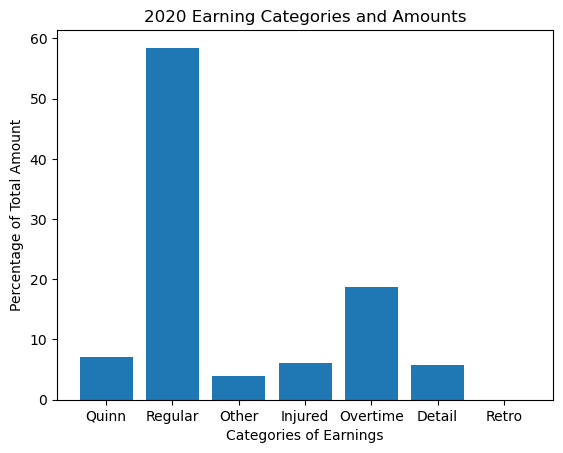

In [22]:
categories = ['Quinn', 'Regular', 'Other', 'Injured', 'Overtime', 'Detail', 'Retro']
values = [percent2020Quinn, percent2020Regular, percent2020Other, percent2020Injured, percent2020Overtime, percent2020Detail, percent2020Retro]
chart2020 = plt.bar(categories, values)
plt.xlabel('Categories of Earnings')
plt.ylabel('Percentage of Total Amount')
plt.title('2020 Earning Categories and Amounts')
plt.show()

In [23]:
numPeople20 = len(earnings20df)
num2020Injury= (earnings20df[' INJURED '].notna().sum()) /numPeople20
num2020Overtime=(earnings20df[' OVERTIME '].notna().sum()) /numPeople20
num2020Quinn= (earnings20df[' QUINN / EDUCATION INCENTIVE '].notna().sum())/numPeople20
num2020Other= (earnings20df[' OTHER '].notna().sum())/numPeople20
num2020Retro= (earnings20df[' RETRO '].notna().sum())/numPeople20
num2020Detail= (earnings20df[' DETAIL '].notna().sum())/numPeople20

### 2019 Employee Earnings Data

In [24]:
earnings19

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Bottomley,Torii A",BPS Business Service,BPS Worker's Comp Job Class,-,-,-,-,"772,034.24",-,-,"772,034.24",1938
1,"Smith,Lincoln",Workers Compensation Service,Workers Comp Job Classificatn,-,-,-,-,"401,182.80",-,-,"401,182.80",2125
2,"Kervin,Timothy M.",Boston Police Department,Police Lieutenant/Hdq Dispatch,"142,061.86",-,"21,262.85","115,361.12",-,"41,360.00","35,492.87","355,538.70",2135
3,"Danilecki,John H",Boston Police Department,Police Captain,"161,608.85",-,"24,040.29","68,964.13",-,"53,040.00","40,402.20","348,055.47",2081
4,"Maguire,Joseph M",Boston Police Department,Police Sergeant/Hdq Dispatcher,"128,912.77",-,"7,128.30","121,616.21",-,"55,544.00","31,310.86","344,512.14",2038
...,...,...,...,...,...,...,...,...,...,...,...,...
23307,"Keeler,Daniel M",Boston Police Department,Police Sergeant,-,-,2.50,-,-,-,-,2.50,34114
23308,"St. Louis,Ruth",BPS Transportation,Cab Monitor,-,2.24,-,-,-,-,-,2.24,2124
23309,"Charles,Wesler",BPS Transportation,Standby Cab Monitor HE,-,2.24,-,-,-,-,-,2.24,2121
23310,"Smith,Ann Lashelle",BPS Substitute Teachers/Nurs,Substitute Teacher,-,2.19,-,-,-,-,-,2.19,2119


In [25]:
import numpy as np

def replace_dash_with_nan(value):
    if str(value).strip() == '-':
        return np.nan
    return value

# Apply the function to the entire DataFrame
earnings19 = earnings19.applymap(replace_dash_with_nan)
earnings19

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Bottomley,Torii A",BPS Business Service,BPS Worker's Comp Job Class,NaN,NaN,NaN,NaN,"772,034.24",NaN,NaN,"772,034.24",1938
1,"Smith,Lincoln",Workers Compensation Service,Workers Comp Job Classificatn,NaN,NaN,NaN,NaN,"401,182.80",NaN,NaN,"401,182.80",2125
2,"Kervin,Timothy M.",Boston Police Department,Police Lieutenant/Hdq Dispatch,"142,061.86",NaN,"21,262.85","115,361.12",NaN,"41,360.00","35,492.87","355,538.70",2135
3,"Danilecki,John H",Boston Police Department,Police Captain,"161,608.85",NaN,"24,040.29","68,964.13",NaN,"53,040.00","40,402.20","348,055.47",2081
4,"Maguire,Joseph M",Boston Police Department,Police Sergeant/Hdq Dispatcher,"128,912.77",NaN,"7,128.30","121,616.21",NaN,"55,544.00","31,310.86","344,512.14",2038
...,...,...,...,...,...,...,...,...,...,...,...,...
23307,"Keeler,Daniel M",Boston Police Department,Police Sergeant,NaN,NaN,2.50,NaN,NaN,NaN,NaN,2.50,34114
23308,"St. Louis,Ruth",BPS Transportation,Cab Monitor,NaN,2.24,NaN,NaN,NaN,NaN,NaN,2.24,2124
23309,"Charles,Wesler",BPS Transportation,Standby Cab Monitor HE,NaN,2.24,NaN,NaN,NaN,NaN,NaN,2.24,2121
23310,"Smith,Ann Lashelle",BPS Substitute Teachers/Nurs,Substitute Teacher,NaN,2.19,NaN,NaN,NaN,NaN,NaN,2.19,2119


In [26]:
earnings19['TOTAL EARNINGS'] = earnings19['TOTAL EARNINGS'].str.replace('[\$,]', '', regex=True).str.replace(" ", '', regex=True).astype(float)
earnings19[' QUINN/EDUCATION INCENTIVE '] = earnings19[' QUINN/EDUCATION INCENTIVE '].str.replace('[\$, ]', '', regex=True).astype(float)
earnings19[' REGULAR '] = earnings19[' REGULAR '].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings19[' OTHER '] = earnings19[' OTHER '].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings19[' OVERTIME '] = earnings19[' OVERTIME '].str.replace('[\$,()]', '', regex=True).astype(float)
earnings19[' INJURED '] = earnings19[' INJURED '].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings19[' DETAIL '] = earnings19[' DETAIL '].str.replace('[\$, ]', '', regex=True).astype(float)
earnings19[' RETRO '] = earnings19[' RETRO '].str.replace('[\$, ]', '', regex=True).astype(float)

In [27]:
departments2019 = earnings19.groupby('DEPARTMENT_NAME')['TOTAL EARNINGS'].mean()

departments2019 = departments2019.sort_values(ascending= False )
departments2019
departments2019 = departments2019.head(10)

In [28]:
earnings19df = earnings19[earnings19['DEPARTMENT_NAME'].str.contains('Boston Police Department')]
total2019Earnings = earnings19df['TOTAL EARNINGS'].sum()
total2019Quinn = earnings19df[' QUINN/EDUCATION INCENTIVE '].sum()
total2019Regular = earnings19df[' REGULAR '].sum()
total2019Other = earnings19df[' OTHER '].sum()
total2019Overtime= earnings19df[' OVERTIME '].sum()
total2019Injured = earnings19df[' INJURED '].sum()
total2019Detail = earnings19df[' DETAIL '].sum()
total2019Retro = earnings19df[' RETRO '].sum()


print("The Total for Quinn Educational: " + str(total2019Quinn))
print("The Total for Regular Pay: " + str(total2019Regular))
print("The Total for Other Pay: " + str(total2019Other))
print("The Total for Overtime: " + str(total2019Overtime))
print("The Total for Injured: " + str(total2019Injured))
print("The Total for Detail: " + str(total2019Detail))
print("The Total for Retro: " + str(total2019Retro))

total = total2019Other + total2019Quinn + total2019Overtime + total2019Injured + total2019Regular + total2019Detail + total2019Retro

#Sanity Check
print("Total Combined: " + str(total))
print("The Total Earnings made by police officers: " + str(total2019Earnings))

The Total for Quinn Educational: 28870855.36
The Total for Regular Pay: 245079952.77
The Total for Other Pay: 15341375.719999999
The Total for Overtime: 77764302.50999999
The Total for Injured: 17404626.34
The Total for Detail: 31249277.0
The Total for Retro: 26269.319999999996
Total Combined: 415736659.02
The Total Earnings made by police officers: 415725606.8


In [29]:
percent2019Quinn = (total2019Quinn / total) * 100
percent2019Regular = (total2019Regular / total) * 100
percent2019Other = (total2019Other / total) * 100
percent2019Overtime =(total2019Overtime / total) *100
percent2019Injured = (total2019Injured / total) * 100
percent2019Detail = (total2019Detail / total) * 100
percent2019Retro = (total2019Retro / total) * 100

print(percent2019Quinn)
print(percent2019Detail)
print(percent2019Injured)
print(percent2019Regular)
print(percent2019Overtime)
print(percent2019Retro)
print(percent2019Other)

6.944505550233687
7.516603677352562
4.186454565018936
58.9507678605292
18.70518291394143
0.006318740344410246
3.690166692579777


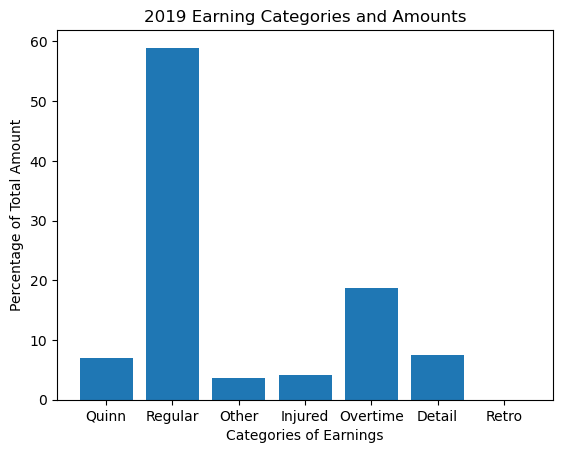

In [30]:
categories = ['Quinn', 'Regular', 'Other', 'Injured', 'Overtime', 'Detail', 'Retro']
values = [percent2019Quinn, percent2019Regular, percent2019Other, percent2019Injured, percent2019Overtime, percent2019Detail, percent2019Retro]
chart2019 = plt.bar(categories, values)
plt.xlabel('Categories of Earnings')
plt.ylabel('Percentage of Total Amount')
plt.title('2019 Earning Categories and Amounts')
plt.show()

In [31]:
numPeople19 = len(earnings19df)
num2019Injury= (earnings19df[' INJURED '].notna().sum())/numPeople19
num2019Overtime= (earnings19df[' OVERTIME '].notna().sum())/numPeople19
num2019Quinn= (earnings19df[' QUINN/EDUCATION INCENTIVE '].notna().sum())/numPeople19
num2019Other= (earnings19df[' OTHER '].notna().sum())/numPeople19
num2019Retro= (earnings19df[' RETRO '].notna().sum())/numPeople19
num2019Detail= (earnings19df[' DETAIL '].notna().sum())/numPeople19

### 2018 Employee Earnings data

In [32]:
earnings18
column_names = earnings18.columns
row_with_column_names = earnings18[earnings18.apply(lambda row: row.isin(column_names).all(), axis=1)]

if not row_with_column_names.empty:
    earnings18 = earnings18.drop(row_with_column_names.index)
earnings18

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Williams,David C.",Boston Police Department,Police Officer,"95,184.68",NaN,"503,025.78","45,176.88","5,307.62","24,610.00","4,375.69","677,680.65",02356
1,"Earley,John W",Boston Police Department,Police Lieutenant,"26,130.54","13,001.47","204,120.61",668.36,NaN,440.00,"6,532.63","250,893.61",02131
2,"Bucelewicz,Helen",Boston Police Department,Police Officer,"8,676.89",NaN,"200,000.00",NaN,NaN,NaN,NaN,"208,676.89",02135
3,"Evans,William B",Boston Police Department,Commissioner (Bpd),"149,999.93","3,461.56","165,858.44",NaN,NaN,NaN,NaN,"319,319.93",02127
4,"Jones,Ronnie C",Boston Police Department,Police Officer,"462,149.98",NaN,"114,973.46",NaN,NaN,NaN,NaN,"577,123.44",02126
...,...,...,...,...,...,...,...,...,...,...,...,...
23600,"Zingarelli,Lauren Marie",Environment Department,Dir CCE,"79,028.14",886.62,"1,146.98",NaN,NaN,NaN,NaN,"81,061.74",02128
23601,"Zlab,Reilly",Dpt of Innovation & Technology,Prin Data Proc Systems Analyst,"95,796.61","1,996.57",784.76,823.12,NaN,NaN,NaN,"99,401.06",02215
23602,"Zlody,Maura T.",Environment Department,Environmental Asst,"66,792.43",741.30,NaN,NaN,NaN,NaN,NaN,"67,533.73",02215
23603,"Zoran,Mor",ASD Office of Budget Mangmnt,Revenue Manager (OBM),"77,583.15","1,746.62","1,349.28","4,226.15",NaN,NaN,NaN,"84,905.20",02113


In [33]:
earnings18['TOTAL EARNINGS'] = earnings18['TOTAL EARNINGS'].str.replace('[\$,]', '', regex=True).str.replace(" ", '', regex=True).astype(float)
earnings18['QUINN/EDUCATION INCENTIVE'] = earnings18['QUINN/EDUCATION INCENTIVE'].str.replace('[\$, ]', '', regex=True).astype(float)
earnings18['REGULAR'] = earnings18['REGULAR'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings18['OTHER'] = earnings18['OTHER'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings18['OVERTIME'] = earnings18['OVERTIME'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings18['INJURED'] = earnings18['INJURED'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings18['DETAIL'] = earnings18['DETAIL'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings18['RETRO'] = earnings18['RETRO'].str.replace('[\$,() ]', '', regex=True).astype(float)

In [34]:
departments2018 = earnings18.groupby('DEPARTMENT_NAME')['TOTAL EARNINGS'].mean()

departments2018 = departments2018.sort_values(ascending= False )
departments2018
departments2018 = departments2018.head(10)

In [35]:
earnings18df = earnings18[earnings18['DEPARTMENT_NAME'].str.contains('Boston Police Department')]
total2018Earnings = earnings18df['TOTAL EARNINGS'].sum()
total2018Quinn = earnings18df['QUINN/EDUCATION INCENTIVE'].sum()
total2018Regular = earnings18df['REGULAR'].sum()
total2018Other = earnings18df['OTHER'].sum()
total2018Overtime= earnings18df['OVERTIME'].sum()
total2018Injured = earnings18df['INJURED'].sum()
total2018Detail = earnings18df['DETAIL'].sum()
total2018Retro = earnings18df['RETRO'].sum()


print("The Total for Quinn Educational: " + str(total2018Quinn))
print("The Total for Regular Pay: " + str(total2018Regular))
print("The Total for Other Pay: " + str(total2018Other))
print("The Total for Overtime: " + str(total2018Overtime))
print("The Total for Injured: " + str(total2018Injured))
print("The Total for Detail: " + str(total2018Detail))
print("The Total for RETRO: " + str(total2018Retro))


#Sanity Check
print("Total Combined: " + str(total2018Other + total2018Quinn + total2018Overtime + total2018Injured + total2018Regular + total2018Detail + total2018Retro))
print("The Total Earnings made by police officers: " + str(total2018Earnings))

The Total for Quinn Educational: 24944719.41
The Total for Regular Pay: 240001127.16
The Total for Other Pay: 16476016.099999998
The Total for Overtime: 77855435.97999999
The Total for Injured: 14971892.08
The Total for Detail: 33957211.0
The Total for RETRO: 8476598.21
Total Combined: 416682999.94
The Total Earnings made by police officers: 416682999.93999994


In [36]:
percent2018Quinn = (total2018Quinn / total2018Earnings) * 100
percent2018Regular = (total2018Regular / total2018Earnings) * 100
percent2018Other = (total2018Other / total2018Earnings) * 100
percent2018Overtime =(total2018Overtime / total2018Earnings) *100
percent2018Injured = (total2018Injured / total2018Earnings) * 100
percent2018Detail = (total2018Detail / total2018Earnings) * 100
percent2018Retro = (total2019Retro / total2018Earnings) * 100

print(percent2018Quinn)
print(percent2018Detail)
print(percent2018Injured)
print(percent2018Regular)
print(percent2018Overtime)
print(percent2018Retro)
print(percent2018Other)

5.986497988540906
8.149411184255094
3.593113249678021
57.59801268459689
18.684572202660235
0.0063043896688328134
3.9540888642859087


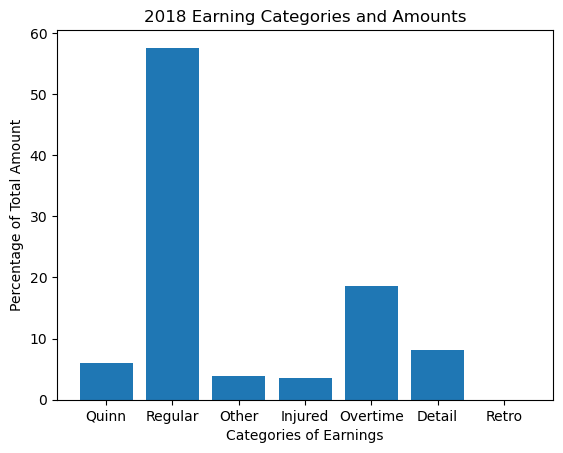

In [37]:
categories = ['Quinn', 'Regular', 'Other', 'Injured', 'Overtime', 'Detail', 'Retro']
values = [percent2018Quinn, percent2018Regular, percent2018Other, percent2018Injured, percent2018Overtime, percent2018Detail, percent2018Retro]
chart2018 = plt.bar(categories, values)
plt.xlabel('Categories of Earnings')
plt.ylabel('Percentage of Total Amount')
plt.title('2018 Earning Categories and Amounts')
plt.show()

In [38]:
numPeople18 = len(earnings18df)
num2018Injury= (earnings18df['INJURED'].notna().sum()) /numPeople18
num2018Overtime= (earnings18df['OVERTIME'].notna().sum())/numPeople18
num2018Quinn= (earnings18df['QUINN/EDUCATION INCENTIVE'].notna().sum())/numPeople18
num2018Other= (earnings18df['OTHER'].notna().sum())/numPeople18
num2018Retro= (earnings18df['RETRO'].notna().sum())/numPeople18
num2018Detail= (earnings18df['DETAIL'].notna().sum())/numPeople18


### 2017 Employee Earnings Data

In [39]:
earnings17

,NAME,DEPARTMENT NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Miller,Francis T",Boston Police Department,Police Lieutenant (Det),"$129,530.83",NaN,"$13,694.50","$8,150.41",NaN,NaN,"$24,286.86","$175,662.60",2043
1,"Sullivan,Patrice Murphy",Boston Police Department,Office Manager,"$56,921.80",NaN,"$3,594.65","$1,548.16",NaN,NaN,NaN,"$62,064.61",2132
2,"O'Hara,Michael C",Boston Police Department,Police Lieutenant,"$124,056.64",NaN,"$6,432.23","$29,043.67",NaN,"$22,385.00","$23,260.69","$205,178.23",2021
3,"Whalen,Richard L",Boston Police Department,Police Detective,"$94,956.25","$4,985.32","$13,591.93","$85,419.22",$58.03,"$16,330.00","$19,971.01","$235,311.76",2062
4,"Kelly,Ann Marie",Boston Police Department,Tape Librarian I (BPD),"$69,995.34",NaN,$300.00,"$7,961.08",NaN,NaN,NaN,"$78,256.42",2190
...,...,...,...,...,...,...,...,...,...,...,...,...
22240,"Flaherty,Thomas C",Boston Police Department,Police Officer,"$1,704.01",$99.24,NaN,NaN,"$5,280.78",NaN,NaN,"$7,084.03",2122
22241,"Simon,Victor",Parks Department,Laborer Seasonal (Parks),"$2,777.44",$55.55,NaN,NaN,NaN,NaN,NaN,"$2,832.99",2132
22242,"Lara,Diana D",Edison K-8,Part-Time Cafeteria Attendant,"$6,610.00",NaN,$122.00,NaN,NaN,NaN,NaN,"$6,732.00",2119
22243,"Gross,William Brenden",Boston Police Department,Police Officer,"$1,170.50",NaN,NaN,NaN,NaN,NaN,NaN,"$1,170.50",2125


In [40]:
earnings17['TOTAL EARNINGS'] = earnings17['TOTAL EARNINGS'].str.replace('[\$,]', '', regex=True).str.replace(" ", '', regex=True).astype(float)
earnings17['QUINN/EDUCATION INCENTIVE'] = earnings17['QUINN/EDUCATION INCENTIVE'].str.replace('[\$, ()]', '', regex=True).astype(float)
earnings17['REGULAR'] = earnings17['REGULAR'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings17['OTHER'] = earnings17['OTHER'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings17['OVERTIME'] = earnings17['OVERTIME'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings17['INJURED'] = earnings17['INJURED'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings17['DETAIL'] = earnings17['DETAIL'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings17['RETRO'] = earnings17['RETRO'].str.replace('[\$,() ]', '', regex=True).astype(float)

In [41]:
departments2017 = earnings17.groupby('DEPARTMENT NAME')['TOTAL EARNINGS'].mean()

departments2017 = departments2017.sort_values(ascending= False )
departments2017
departments2017 = departments2017.head(10)

In [42]:
earnings17df = earnings17[earnings17['DEPARTMENT NAME'].str.contains('Boston Police Department')]
total2017Earnings = earnings17df['TOTAL EARNINGS'].sum()
total2017Quinn = earnings17df['QUINN/EDUCATION INCENTIVE'].sum()
total2017Regular = earnings17df['REGULAR'].sum()
total2017Other = earnings17df['OTHER'].sum()
total2017Overtime= earnings17df['OVERTIME'].sum()
total2017Injured = earnings17df['INJURED'].sum()
total2017Detail = earnings17df['DETAIL'].sum()
total2017Retro = earnings17df['RETRO'].sum()


print("The Total for Quinn Educational: " + str(total2017Quinn))
print("The Total for Regular Pay: " + str(total2017Regular))
print("The Total for Other Pay: " + str(total2017Other))
print("The Total for Overtime: " + str(total2017Overtime))
print("The Total for Injured: " + str(total2017Injured))
print("The Total for Detail: " + str(total2017Detail))
print("The Total for Retro: " + str(total2017Retro))

total = total2017Other + total2017Quinn + total2017Overtime + total2017Injured + total2017Regular + total2017Detail + total2017Retro

#Sanity Check
print("Total Combined: " + str(total))
print("The Total Earnings made by police officers: " + str(total2017Earnings))

The Total for Quinn Educational: 20296563.97
The Total for Regular Pay: 230279647.59
The Total for Other Pay: 14457425.12
The Total for Overtime: 66933649.86999999
The Total for Injured: 12661907.719999999
The Total for Detail: 38702640.0
The Total for Retro: 7973703.26
Total Combined: 391305537.53
The Total Earnings made by police officers: 391277619.77000004


In [43]:
percent2017Quinn = (total2017Quinn / total) * 100
percent2017Regular = (total2017Regular / total) * 100
percent2017Other = (total2017Other / total) * 100
percent2017Overtime =(total2017Overtime / total) *100
percent2017Injured = (total2017Injured / total) * 100
percent2017Detail = (total2017Detail / total) * 100
percent2017Retro = (total2017Retro / total) * 100
print(percent2017Quinn)
print(percent2017Detail)
print(percent2017Injured)
print(percent2017Regular)
print(percent2017Overtime)
print(percent2017Retro)
print(percent2017Other)

5.18688391125667
9.890644595601412
3.2358110237653506
58.84906435098566
17.10521407197526
2.0377179710595548
3.694664075356102


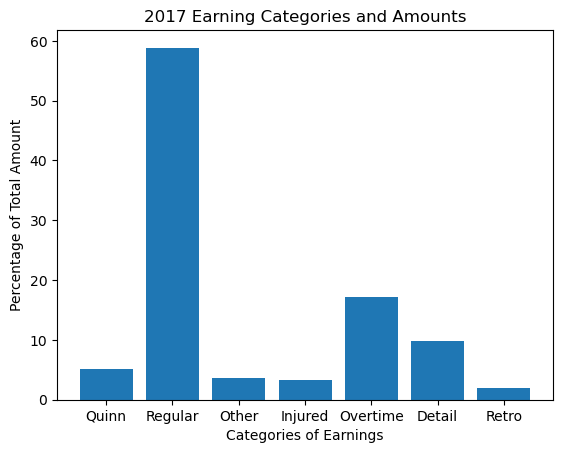

In [44]:
categories = ['Quinn', 'Regular', 'Other', 'Injured', 'Overtime', 'Detail', 'Retro']
values = [percent2017Quinn, percent2017Regular, percent2017Other, percent2017Injured, percent2017Overtime, percent2017Detail, percent2017Retro]
chart2017 = plt.bar(categories, values)
plt.xlabel('Categories of Earnings')
plt.ylabel('Percentage of Total Amount')
plt.title('2017 Earning Categories and Amounts')
plt.show()

In [45]:
numPeople17 = len(earnings17df)
num2017Injury= (earnings17df['INJURED'].notna().sum())/numPeople17
num2017Overtime= (earnings17df['OVERTIME'].notna().sum())/numPeople17
num2017Quinn= (earnings17df['QUINN/EDUCATION INCENTIVE'].notna().sum())/numPeople17
num2017Other= (earnings17df['OTHER'].notna().sum())/numPeople17
num2017Retro= (earnings17df['RETRO'].notna().sum())/numPeople17
num2017Detail= (earnings17df['DETAIL'].notna().sum())/numPeople17

### 2016 Employee Earnings Data

In [46]:
earnings16

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Abadi,Kidani A",Assessing Department,Property Officer,"$46,291.98",NaN,$300.00,NaN,NaN,NaN,NaN,"$46,591.98",02118
1,"Abasciano,Joseph",Boston Police Department,Police Officer,"$6,933.66",NaN,$850.00,$205.92,"$74,331.86",NaN,"$15,258.44","$97,579.88",02132
2,"Abban,Christopher John",Boston Fire Department,Fire Fighter,"$103,442.22",NaN,$550.00,"$15,884.53",NaN,"$4,746.50",NaN,"$124,623.25",02132
3,"Abbasi,Sophia",Green Academy,Manager (C) (non-ac),"$18,249.83",NaN,NaN,NaN,NaN,NaN,NaN,"$18,249.83",02148
4,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,"$84,410.28",NaN,"$1,250.00",NaN,NaN,NaN,NaN,"$85,660.28",02481
...,...,...,...,...,...,...,...,...,...,...,...,...
22041,"Zukowski III,Charles",BPS School Safety Service,Officer-Bps Police,"$45,118.54",NaN,$600.00,$271.92,NaN,NaN,NaN,"$45,990.46",02124
22042,"Zuluaga Castro,Juan Pablo",Boston Cntr - Youth & Families,Lifeguard I,"$3,538.84",NaN,NaN,$51.78,NaN,NaN,NaN,"$3,590.62",02128
22043,"Zwarich,Maralene Zoann",Dudley St. Neighborhood School,Teacher,"$41,747.07",NaN,NaN,NaN,NaN,NaN,NaN,"$41,747.07",02118
22044,"Zweig,Susanna B",BPS Substitute Teachers/Nurs,Substitute Teacher HE,"$29,489.32",NaN,NaN,NaN,NaN,NaN,NaN,"$29,489.32",02125


In [47]:
earnings16['TOTAL EARNINGS'] = earnings16['TOTAL EARNINGS'].str.replace('[\$,]', '', regex=True).str.replace(" ", '', regex=True).astype(float)
earnings16['QUINN/EDUCATION INCENTIVE'] = earnings16['QUINN/EDUCATION INCENTIVE'].str.replace('[\$, ]', '', regex=True).astype(float)
earnings16['REGULAR'] = earnings16['REGULAR'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings16['OTHER'] = earnings16['OTHER'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings16['OVERTIME'] = earnings16['OVERTIME'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings16['INJURED'] = earnings16['INJURED'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings16['DETAIL'] = earnings16['DETAIL'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings16['RETRO'] = earnings16['RETRO'].str.replace('[\$,() ]', '', regex=True).astype(float)

In [48]:
departments2016 = earnings16.groupby('DEPARTMENT_NAME')['TOTAL EARNINGS'].mean()

departments2016 = departments2016.sort_values(ascending= False )
departments2016
departments2016 = departments2016.head(10)

In [49]:
earnings16df = earnings16[earnings16['DEPARTMENT_NAME'].str.contains('Boston Police Department')]
total2016Earnings = earnings16df['TOTAL EARNINGS'].sum()
total2016Quinn = earnings16df['QUINN/EDUCATION INCENTIVE'].sum()
total2016Regular = earnings16df['REGULAR'].sum()
total2016Other = earnings16df['OTHER'].sum()
total2016Overtime= earnings16df['OVERTIME'].sum()
total2016Injured = earnings16df['INJURED'].sum()
total2016Detail = earnings16df['DETAIL'].sum()
total2016Retro = earnings16df['RETRO'].sum()


print("The Total for Quinn Educational: " + str(total2016Quinn))
print("The Total for Regular Pay: " + str(total2016Regular))
print("The Total for Other Pay: " + str(total2016Other))
print("The Total for Overtime: " + str(total2016Overtime))
print("The Total for Injured: " + str(total2016Injured))
print("The Total for Detail: " + str(total2016Detail))
print("The Total for Retro: " + str(total2016Retro))

#Sanity Check
print("Total Combined: " + str(total2016Other + total2016Quinn + total2016Overtime + total2016Injured + total2016Regular + total2016Detail + total2016Retro))
print("The Total Earnings made by police officers: " + str(total2016Earnings))

The Total for Quinn Educational: 18750323.200000003
The Total for Regular Pay: 224061953.43
The Total for Other Pay: 13031498.95
The Total for Overtime: 60989917.25
The Total for Injured: 10838924.379999999
The Total for Detail: 39712567.0
The Total for Retro: 21202046.9
Total Combined: 388587231.11
The Total Earnings made by police officers: 388587231.11


In [50]:
percent2016Quinn = (total2016Quinn / total2016Earnings) * 100
percent2016Regular = (total2016Regular / total2016Earnings) * 100
percent2016Other = (total2016Other / total2016Earnings) * 100
percent2016Overtime =(total2016Overtime / total2016Earnings) *100
percent2016Injured = (total2016Injured / total2016Earnings) * 100
percent2016Detail = (total2016Detail / total2016Earnings) * 100
percent2016Retro = (total2016Retro / total2016Earnings) * 100

print(percent2016Quinn)
print(percent2016Detail)
print(percent2016Injured)
print(percent2016Regular)
print(percent2016Overtime)
print(percent2016Retro)
print(percent2016Other)

4.825254588638869
10.219730300082427
2.789315631663602
57.66065776015509
15.695296285413757
5.4561872348291836
3.353558199217072


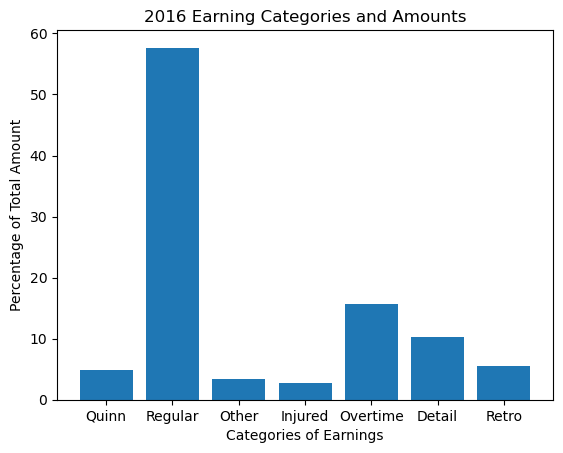

In [51]:
categories = ['Quinn', 'Regular', 'Other', 'Injured', 'Overtime', 'Detail', 'Retro']
values = [percent2016Quinn, percent2016Regular, percent2016Other, percent2016Injured, percent2016Overtime, percent2016Detail, percent2016Retro]
chart2016 = plt.bar(categories, values)
plt.xlabel('Categories of Earnings')
plt.ylabel('Percentage of Total Amount')
plt.title('2016 Earning Categories and Amounts')
plt.show()

In [52]:
numPeople16 = len(earnings16df)
num2016Injury= (earnings16df['INJURED'].notna().sum())/numPeople16
num2016Overtime= (earnings16df['OVERTIME'].notna().sum())/numPeople16
num2016Quinn= (earnings16df['QUINN/EDUCATION INCENTIVE'].notna().sum())/numPeople16
num2016Other= (earnings16df['OTHER'].notna().sum())/numPeople16
num2016Retro= (earnings16df['RETRO'].notna().sum())/numPeople16
num2016Detail= (earnings16df['DETAIL'].notna().sum())/numPeople16


### 2015 Employee Earnings Data

In [53]:
earnings15

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAILS,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Abadi,Kidani A",Assessing Department,Property Officer,$44006.26,$0.00,$275.00,$324.12,$0.00,$0.00,$0.00,$44605.38,02118
1,"Abasciano,Joseph",Boston Police Department,Police Officer,$-886.20,$0.00,$8088.35,$544.83,$81996.78,$0.00,$20667.80,$110411.56,02132
2,"Abban,Christopher John",Boston Fire Department,Fire Fighter,$101468.29,$0.00,$550.00,$15146.51,$0.00,$5168.00,$0.00,$122332.80,02132
3,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,$42919.31,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$42919.31,02481
4,"Abberton,James P",Public Works Department,Maint Mech (Carpenter)##,$39768.17,$0.00,$126.00,$13974.97,$0.00,$0.00,$0.00,$53869.14,02127
...,...,...,...,...,...,...,...,...,...,...,...,...
21897,"Zucker,Alyse Paige",BPS Special Education,Audiologist,$80850.29,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$80850.29,01907
21898,"Zuckerman,Naomi Julia",Umana Middle,Teacher,$78331.93,$0.00,$1250.00,$0.00,$0.00,$0.00,$0.00,$79581.93,02474
21899,"Zukowski III,Charles",BPS School Safety Service,Officer-Bps Police,$46146.90,$0.00,$600.00,$71.14,$0.00,$0.00,$0.00,$46818.04,02124
21900,"Zweig,Susanna B",BPS Substitute Teachers/Nurs,Substitute Teacher,$58416.93,$0.00,$4670.00,$0.00,$0.00,$0.00,$0.00,$63086.93,02125


In [54]:
earnings15['TOTAL EARNINGS'] = earnings15['TOTAL EARNINGS'].str.replace('[\$,]', '', regex=True).str.replace(" ", '', regex=True).astype(float)
earnings15['QUINN/EDUCATION INCENTIVE'] = earnings15['QUINN/EDUCATION INCENTIVE'].str.replace('[\$, ]', '', regex=True).astype(float)
earnings15['REGULAR'] = earnings15['REGULAR'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings15['OTHER'] = earnings15['OTHER'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings15['OVERTIME'] = earnings15['OVERTIME'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings15['INJURED'] = earnings15['INJURED'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings15['DETAILS'] = earnings15['DETAILS'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings15['RETRO'] = earnings15['RETRO'].str.replace('[\$,() ]', '', regex=True).astype(float)

In [55]:
departments2015 = earnings15.groupby('DEPARTMENT_NAME')['TOTAL EARNINGS'].mean()
departments2015 = departments2015.sort_values(ascending= False )
departments2015 = departments2015.head(10)

In [56]:
earnings15df = earnings15[earnings15['DEPARTMENT_NAME'].str.contains('Boston Police Department')]
total2015Earnings = earnings15df['TOTAL EARNINGS'].sum()
total2015Quinn = earnings15df['QUINN/EDUCATION INCENTIVE'].sum()
total2015Regular = earnings15df['REGULAR'].sum()
total2015Other = earnings15df['OTHER'].sum()
total2015Overtime= earnings15df['OVERTIME'].sum()
total2015Injured = earnings15df['INJURED'].sum()
total2015Detail = earnings15df['DETAILS'].sum()
total2015Retro = earnings15df['RETRO'].sum()


print("The Total for Quinn Educational: " + str(total2015Quinn))
print("The Total for Regular Pay: " + str(total2015Regular))
print("The Total for Other Pay: " + str(total2015Other))
print("The Total for Overtime: " + str(total2015Overtime))
print("The Total for Injured: " + str(total2015Injured))
print("The Total for Detail: " + str(total2015Detail))
print("The Total for Retro: " + str(total2015Retro))


#Sanity Check
print("Total Combined: " + str(total2015Other + total2015Quinn + total2015Overtime + total2015Injured + total2015Regular + total2015Detail + total2015Retro))
print("The Total Earnings made by police officers: " + str(total2015Earnings))

The Total for Quinn Educational: 17274479.88
The Total for Regular Pay: 221915734.5
The Total for Other Pay: 12831430.030000001
The Total for Overtime: 61608144.93
The Total for Injured: 8095216.93
The Total for Detail: 36373224.0
The Total for Retro: 39646.22
Total Combined: 358137876.49
The Total Earnings made by police officers: 358137876.49


In [57]:
percent2015Quinn = (total2015Quinn / total2015Earnings) * 100
percent2015Regular = (total2015Regular / total2015Earnings) * 100
percent2015Other = (total2015Other / total2015Earnings) * 100
percent2015Overtime =(total2015Overtime / total2015Earnings) *100
percent2015Injured = (total2015Injured / total2015Earnings) * 100
percent2015Detail = (total2015Detail / total2015Earnings) * 100
percent2015Retro = (total2015Retro / total2015Earnings) * 100

print(percent2015Quinn)
print(percent2015Detail)
print(percent2015Injured)
print(percent2015Regular)
print(percent2015Overtime)
print(percent2015Retro)
print(percent2015Other)

4.823416067940622
10.156206977179533
2.2603632459483896
61.96377123663333
17.202353890574944
0.011070099702539285
3.582818482020648


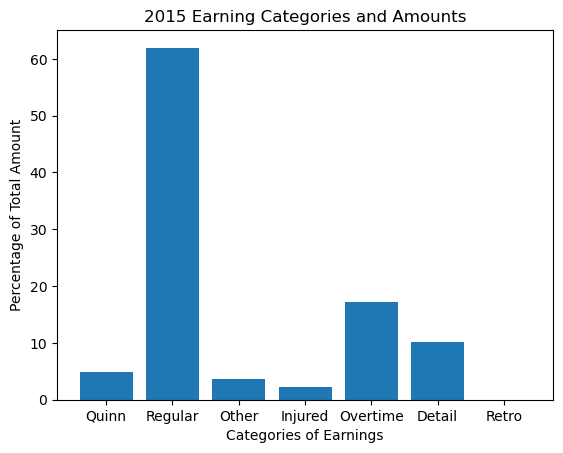

In [58]:

categories = ['Quinn', 'Regular', 'Other', 'Injured', 'Overtime', 'Detail', 'Retro']
values = [percent2015Quinn, percent2015Regular, percent2015Other, percent2015Injured, percent2015Overtime, percent2015Detail, percent2015Retro]
chart2015 = plt.bar(categories, values)
plt.xlabel('Categories of Earnings')
plt.ylabel('Percentage of Total Amount')
plt.title('2015 Earning Categories and Amounts')
plt.show()

In [59]:
numPeople15 = len(earnings15df)
earnings15dff = earnings15df.replace(0, np.nan)
earnings15dff = earnings15df.replace(0.0, np.nan)
num2015Injury= (earnings15dff['INJURED'].notna().sum())/numPeople15
num2015Overtime= (earnings15dff['OVERTIME'].notna().sum())/numPeople15
num2015Quinn= (earnings15dff['QUINN/EDUCATION INCENTIVE'].notna().sum())/numPeople15
num2015Other= (earnings15dff['OTHER'].notna().sum())/numPeople15
num2015Retro= (earnings15dff['RETRO'].notna().sum())/numPeople15
num2015Detail=(earnings15dff['DETAILS'].notna().sum())/numPeople15

### 2014 Employee Earnings Data

In [60]:
earnings14

,NAME,TITLE,DEPARTMENT NAME,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN,TOTAL EARNINGS,ZIP
0,"Adario,Anthony J",Supvising Claims Agent (Asd),ASD Human Resources,$98538.32,$0.00,$1842.87,$0.00,$0.00,$0.00,$0.00,$100381.19,02132
1,"Baker,Katherine E.",Nurse Case Manager,ASD Human Resources,$83942.21,$0.00,$225.00,$0.00,$0.00,$0.00,$0.00,$84167.21,02136
2,"Braga,Ann Hess",HumanResourcesComplianceOffcr,ASD Human Resources,$98538.34,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$98538.34,02126
3,"Calobrisi,Jane Ellen",Personnel Analyst,ASD Human Resources,$70073.81,$0.00,$225.00,$0.00,$0.00,$0.00,$0.00,$70298.81,02090
4,"Castillo-Cook,Wendolyn M.",Alcholism Coord I,ASD Human Resources,$79253.11,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$79253.11,02121
...,...,...,...,...,...,...,...,...,...,...,...,...
22228,"Yee,Jacob",Fire Fighter,Boston Fire Department,$80073.63,$13529.71,$550.00,$15560.09,$13353.47,$7245.75,$0.00,$130312.65,02136
22229,"Yetman,Patrick",Fire Fighter,Boston Fire Department,$69886.18,$5191.64,$550.00,$8227.25,$0.00,$0.00,$0.00,$83855.07,02127
22230,"Young,Allan M",Fire Fighter,Boston Fire Department,$97234.17,$14091.91,$3050.00,$6193.76,$0.00,$4464.00,$0.00,$125033.84,02136
22231,"Young,Michael L",Fire Fighter,Boston Fire Department,$95694.84,$13973.38,$550.00,$10678.12,$0.00,$132.00,$0.00,$121028.34,02121


In [61]:
earnings14['TOTAL EARNINGS'] = earnings14['TOTAL EARNINGS'].str.replace('[\$,]', '', regex=True).str.replace(" ", '', regex=True).astype(float)
earnings14['QUINN'] = earnings14['QUINN'].str.replace('[\$, ]', '', regex=True).astype(float)
earnings14['REGULAR'] = earnings14['REGULAR'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings14['OTHER'] = earnings14['OTHER'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings14['OVERTIME'] = earnings14['OVERTIME'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings14['INJURED'] = earnings14['INJURED'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings14['DETAIL'] = earnings14['DETAIL'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings14['RETRO'] = earnings14['RETRO'].str.replace('[\$,() ]', '', regex=True).astype(float)

In [62]:
departments2014 = earnings14.groupby('DEPARTMENT NAME')['TOTAL EARNINGS'].mean()
departments2014 = departments2014.sort_values(ascending= False )
departments2014 = departments2014.head(10)

In [63]:
earnings14df = earnings14[earnings14['DEPARTMENT NAME'].str.contains('Boston Police Department')]
total2014Earnings = earnings14df['TOTAL EARNINGS'].sum()
total2014Quinn = earnings14df['QUINN'].sum()
total2014Regular = earnings14df['REGULAR'].sum()
total2014Other = earnings14df['OTHER'].sum()
total2014Overtime= earnings14df['OVERTIME'].sum()
total2014Injured = earnings14df['INJURED'].sum()
total2014Detail = earnings14df['DETAIL'].sum()
total2014Retro = earnings14df['RETRO'].sum()

print("The Total for Quinn Educational: " + str(total2014Quinn))
print("The Total for Regular Pay: " + str(total2014Regular))
print("The Total for Other Pay: " + str(total2014Other))
print("The Total for Overtime: " + str(total2014Overtime))
print("The Total for Injured: " + str(total2014Injured))
print("The Total for Detail: " + str(total2014Detail))
print("The Total for Retro: " + str(total2014Retro))

#Sanity Check
print("Total Combined: " + str(total2014Other + total2014Quinn + total2014Overtime + total2014Injured + total2014Regular + total2014Detail + total2014Retro))
print("The Total Earnings made by police officers: " + str(total2014Earnings))

The Total for Quinn Educational: 14947216.979999999
The Total for Regular Pay: 209796921.72000003
The Total for Other Pay: 12053703.690000001
The Total for Overtime: 57914605.89
The Total for Injured: 7543413.260000001
The Total for Detail: 29684682.0
The Total for Retro: 25869366.200000003
Total Combined: 357809909.74
The Total Earnings made by police officers: 357809909.74


In [64]:
percent2014Quinn = (total2014Quinn / total2014Earnings) * 100
percent2014Regular = (total2014Regular / total2014Earnings) * 100
percent2014Other = (total2014Other / total2014Earnings) * 100
percent2014Overtime =(total2014Overtime / total2014Earnings) *100
percent2014Injured = (total2014Injured / total2014Earnings) * 100
percent2014Detail = (total2014Detail / total2014Earnings) * 100
percent2014Retro = (total2014Retro / total2014Earnings) * 100
print(percent2014Quinn)
print(percent2014Detail)
print(percent2014Injured)
print(percent2014Regular)
print(percent2014Overtime)
print(percent2014Retro)
print(percent2014Other)

4.177418392593231
8.29621572571038
2.1082180942057662
58.63362528792102
16.185858556036983
7.229918874744914
3.368745068787709


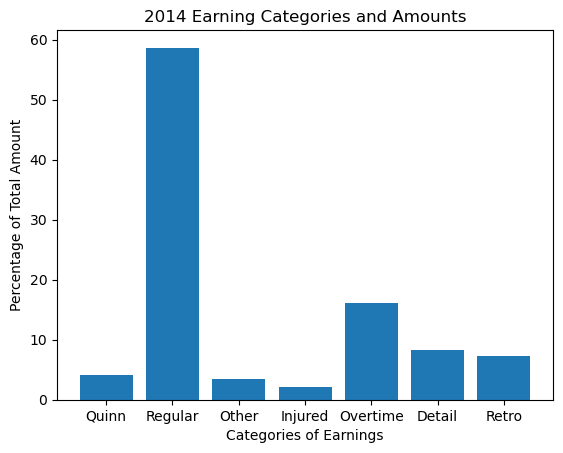

In [65]:
categories = ['Quinn', 'Regular', 'Other', 'Injured', 'Overtime', 'Detail', 'Retro']
values = [percent2014Quinn, percent2014Regular, percent2014Other, percent2014Injured, percent2014Overtime, percent2014Detail, percent2014Retro]
chart2014 = plt.bar(categories, values)
plt.xlabel('Categories of Earnings')
plt.ylabel('Percentage of Total Amount')
plt.title('2014 Earning Categories and Amounts')
plt.show()

In [66]:
numPeople14 = len(earnings14df)
earnings14dff = earnings14df.replace(0, np.nan)
earnings14dff = earnings14df.replace(0.0, np.nan)
num2014Injury= (earnings14dff['INJURED'].notna().sum())/numPeople14
num2014Overtime= (earnings14dff['OVERTIME'].notna().sum())/numPeople14
num2014Quinn= (earnings14dff['QUINN'].notna().sum())/numPeople14
num2014Other= (earnings14dff['OTHER'].notna().sum())/numPeople14
num2014Retro= (earnings14dff['RETRO'].notna().sum())/numPeople14
num2014Detail= (earnings14dff['DETAIL'].notna().sum())/numPeople14


### 2013 Employee Earnings Data

In [67]:
earnings13

,NAME,TITLE,DEPARTMENT,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN,TOTAL EARNINGS,ZIP
0,"Ababio-Fernandez,Ruby A.",Principal Elementary,Boston Public Schools,$0.00,$0.00,$12122.88,$0.00,$0.00,$0.00,$0.00,$12122.88,11001-3647
1,"Abadi,Kidani A",Property Officer,Assessing Department,$37588.30,$0.00,$431.87,$0.00,$0.00,$0.00,$0.00,$38020.17,02118-3126
2,"Abasciano,Joseph",Police Officer,Boston Police Department,$66673.45,$0.00,$800.00,$20318.50,$3163.30,$890.00,$0.00,$91845.25,02132-3802
3,"Abban,Christopher John",Fire Fighter,Boston Fire Department,$87210.42,$0.00,$550.00,$12871.08,$0.00,$4798.00,$0.00,$105429.50,02132-3511
4,"Abbott,John R.",Teacher,Boston Public Schools,$88440.27,$836.63,$0.00,$0.00,$0.00,$0.00,$0.00,$89276.90,02445-2124
...,...,...,...,...,...,...,...,...,...,...,...,...
22464,"Zwicker,Andrew Scott",Developer,Boston Public Schools,$99194.20,$0.00,$11236.80,$0.00,$0.00,$0.00,$0.00,$110431.00,01880-3306
22465,"Arellano,Rebecca",Secretary,Boston City Council,$22469.53,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$22469.53,02130-1109
22466,"Depina,Joceline G.",Secretary,Boston City Council,$58018.55,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$58018.55,02125-2654
22467,"Passacantilli,Stephen M.",Secretary,Boston City Council,$16961.70,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$16961.70,02113-1412


In [68]:
earnings13['TOTAL EARNINGS'] = earnings13['TOTAL EARNINGS'].str.replace('[\$,]', '', regex=True).str.replace(" ", '', regex=True).astype(float)
earnings13['QUINN'] = earnings13['QUINN'].str.replace('[\$, ]', '', regex=True).astype(float)
earnings13['REGULAR'] = earnings13['REGULAR'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings13['OTHER'] = earnings13['OTHER'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings13['OVERTIME'] = earnings13['OVERTIME'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings13['INJURED'] = earnings13['INJURED'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings13['DETAIL'] = earnings13['DETAIL'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings13['RETRO'] = earnings13['RETRO'].str.replace('[\$,() ]', '', regex=True).astype(float)

In [69]:
departments2013 = earnings13.groupby('DEPARTMENT')['TOTAL EARNINGS'].mean()
departments2013 = departments2013.sort_values(ascending= False )
departments2013 = departments2013.head(10)

In [70]:
earnings13df = earnings13[earnings13['DEPARTMENT'].str.contains('Boston Police Department')]
total2013Earnings = earnings13df['TOTAL EARNINGS'].sum()
total2013Quinn = earnings13df['QUINN'].sum()
total2013Regular = earnings13df['REGULAR'].sum()
total2013Other = earnings13df['OTHER'].sum()
total2013Overtime= earnings13df['OVERTIME'].sum()
total2013Injured = earnings13df['INJURED'].sum()
total2013Detail = earnings13df['DETAIL'].sum()
total2013Retro = earnings13df['RETRO'].sum()

print("The Total for Quinn Educational: " + str(total2013Quinn))
print("The Total for Regular Pay: " + str(total2013Regular))
print("The Total for Other Pay: " + str(total2013Other))
print("The Total for Overtime: " + str(total2013Overtime))
print("The Total for Injured: " + str(total2013Injured))
print("The Total for Detail: " + str(total2013Detail))
print("The Total for Retro: " + str(total2013Retro))

#Sanity Check
print("Total Combined: " + str(total2013Other + total2013Quinn + total2013Overtime + total2013Injured + total2013Regular + total2013Detail + total2013Retro))
print("The Total Earnings made by police officers: " + str(total2013Earnings))

The Total for Quinn Educational: 10845231.89
The Total for Regular Pay: 189597872.76000002
The Total for Other Pay: 10202250.84
The Total for Overtime: 57483767.629999995
The Total for Injured: 6253945.11
The Total for Detail: 33208408.509999998
The Total for Retro: 204718.02
Total Combined: 307796194.76
The Total Earnings made by police officers: 307796194.76


In [71]:
percent2013Quinn = (total2013Quinn / total2013Earnings) * 100
percent2013Regular = (total2013Regular / total2013Earnings) * 100
percent2013Other = (total2013Other / total2013Earnings) * 100
percent2013Overtime =(total2013Overtime / total2013Earnings) *100
percent2013Injured = (total2013Injured / total2013Earnings) * 100
percent2013Detail = (total2013Detail / total2013Earnings) * 100
percent2013Retro = (total2013Retro / total2013Earnings) * 100

print(percent2013Quinn)
print(percent2013Detail)
print(percent2013Injured)
print(percent2013Regular)
print(percent2013Overtime)
print(percent2013Retro)
print(percent2013Other)

3.523510710863865
10.78909001324523
2.031846142502324
61.59851095879741
18.67591887379316
0.06651090022721891
3.314612400570797


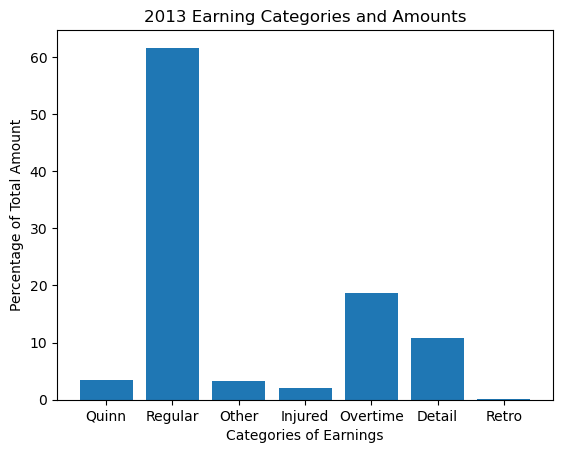

In [72]:
categories = ['Quinn', 'Regular', 'Other', 'Injured', 'Overtime', 'Detail', 'Retro']
values = [percent2013Quinn, percent2013Regular, percent2013Other, percent2013Injured, percent2013Overtime, percent2013Detail, percent2013Retro]
chart2013 = plt.bar(categories, values)
plt.xlabel('Categories of Earnings')
plt.ylabel('Percentage of Total Amount')
plt.title('2013 Earning Categories and Amounts')
plt.show()

In [73]:
numPeople13 = len(earnings13df)
earnings13dff = earnings13df.replace(0, np.nan)
earnings13dff = earnings13df.replace(0.0, np.nan)
num2013Injury= (earnings13dff['INJURED'].notna().sum())/numPeople13
num2013Overtime= (earnings13dff['OVERTIME'].notna().sum())/numPeople13
num2013Quinn= (earnings13dff['QUINN'].notna().sum())/numPeople13
num2013Other= (earnings13dff['OTHER'].notna().sum())/numPeople13
num2013Retro= (earnings13dff['RETRO'].notna().sum())/numPeople13
num2013Detail= (earnings13dff['DETAIL'].notna().sum())/numPeople13


### 2012 Employee Earnings Data

In [74]:
earnings12

,NAME,DEPARTMENT,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN,TOTAL EARNINGS,ZIP
0,"Perch,Rhonda N.",Administration and Finance,Admin Secretary,$43646.22,$199.52,$1120.82,$0.00,$0.00,$0.00,$0.00,$44966.56,02124-3735
1,"Harris,Sonya L.",Administration and Finance,Data Proc Systems Analyst,$72115.30,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$72115.30,02124-3722
2,"Gallagher,Anthony J.",Administration and Finance,Exec Asst,$8828.56,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$8828.56,02113-1172
3,"Natoli,John F.",Administration and Finance,Exec Asst (Obpe),$100486.52,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$100486.52,02108-3407
4,"Quirk,Devin Lyons",Administration and Finance,Exec Asst (Obpe),$84853.21,$0.00,$1629.36,$0.00,$0.00,$0.00,$0.00,$86482.57,02129-3728
...,...,...,...,...,...,...,...,...,...,...,...,...
21135,"Rosario,Jacqueline",Boston Public Library,Library Aide,$3872.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$3872.00,02119
21136,"Chinn,Tsuya",Boston Public Schools,Surround Care Paraprofessional,$37040.89,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$37040.89,02115
21137,"Walsh,Christopher",Boston Public Schools,Teacher,$83859.56,$0.00,$1237.20,$0.00,$0.00,$0.00,$0.00,$85096.76,02114
21138,"Sarofeen,Renee",Boston Public Schools,Substitute Teacher,$23818.98,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$23818.98,01930


In [75]:
earnings12['TOTAL EARNINGS'] = earnings12['TOTAL EARNINGS'].str.replace('[\$,]', '', regex=True).str.replace(" ", '', regex=True).astype(float)
earnings12['QUINN'] = earnings12['QUINN'].str.replace('[\$, ]', '', regex=True).astype(float)
earnings12['REGULAR'] = earnings12['REGULAR'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings12['OTHER'] = earnings12['OTHER'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings12['OVERTIME'] = earnings12['OVERTIME'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings12['INJURED'] = earnings12['INJURED'].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings12['DETAIL '] = earnings12['DETAIL '].str.replace('[\$,() ]', '', regex=True).astype(float)
earnings12['RETRO'] = earnings12['RETRO'].str.replace('[\$,() ]', '', regex=True).astype(float)

In [76]:
departments2012 = earnings12.groupby('DEPARTMENT')['TOTAL EARNINGS'].mean()
departments2012 = departments2012.sort_values(ascending= False )
departments2012 = departments2012.head(10)

In [77]:
earnings12df = earnings12[earnings12['DEPARTMENT'].str.contains('Boston Police Department')]
total2012Earnings = earnings12df['TOTAL EARNINGS'].sum()
total2012Quinn = earnings12df['QUINN'].sum()
total2012Regular = earnings12df['REGULAR'].sum()
total2012Other = earnings12df['OTHER'].sum()
total2012Overtime= earnings12df['OVERTIME'].sum()
total2012Injured = earnings12df['INJURED'].sum()
total2012Detail = earnings12df['DETAIL '].sum()
total2012Retro = earnings12df['RETRO'].sum()

print("The Total for Quinn Educational: " + str(total2012Quinn))
print("The Total for Regular Pay: " + str(total2012Regular))
print("The Total for Other Pay: " + str(total2012Other))
print("The Total for Overtime: " + str(total2012Overtime))
print("The Total for Injured: " + str(total2012Injured))
print("The Total for Detail: " + str(total2012Detail))
print("The Total for Retro: " + str(total2012Retro))

total = total2012Other + total2012Quinn + total2012Overtime + total2012Injured + total2012Regular + total2012Detail +total2012Retro

#Sanity Check
print("Total Combined: " + str(total))
print("The Total Earnings made by police officers: " + str(total2012Earnings))

The Total for Quinn Educational: 10963090.850000001
The Total for Regular Pay: 188824249.61
The Total for Other Pay: 10780472.18
The Total for Overtime: 44697415.97
The Total for Injured: 4896546.18
The Total for Detail: 35542085.0
The Total for Retro: 152775.96
Total Combined: 295856635.75
The Total Earnings made by police officers: 295861606.09000003


In [78]:
percent2012Quinn = (total2012Quinn / total) * 100
percent2012Regular = (total2012Regular / total) * 100
percent2012Other = (total2012Other / total) * 100
percent2012Overtime =(total2012Overtime / total) *100
percent2012Injured = (total2012Injured / total) * 100
percent2012Detail = (total2012Detail / total) * 100
percent2012Retro = (total2012Retro / total) * 100


print(percent2012Quinn)
print(percent2012Detail)
print(percent2012Injured)
print(percent2012Regular)
print(percent2012Overtime)
print(percent2012Retro)
print(percent2012Other)

3.7055416459422785
12.013279644683447
1.6550401743017182
63.82288811313235
15.10779565808674
0.05163851052815198
3.6438162533253236


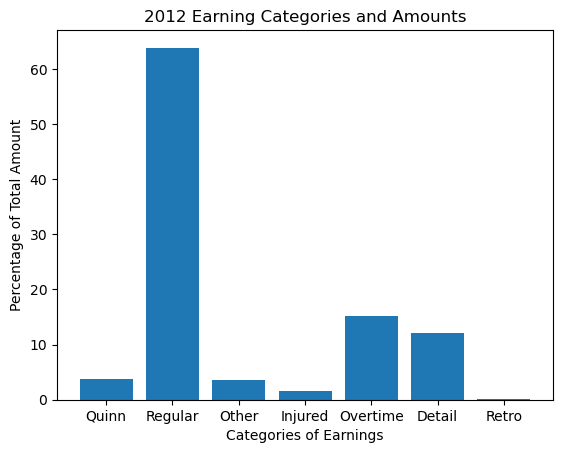

In [79]:

categories = ['Quinn', 'Regular', 'Other', 'Injured', 'Overtime', 'Detail', 'Retro']
values = [percent2012Quinn, percent2012Regular, percent2012Other, percent2012Injured, percent2012Overtime, percent2012Detail, percent2012Retro]
chart2012 = plt.bar(categories, values)
plt.xlabel('Categories of Earnings')
plt.ylabel('Percentage of Total Amount')
plt.title('2012 Earning Categories and Amounts')
plt.show()

In [80]:
numPeople12 = len(earnings12df)
earnings12dff = earnings12df.replace(0, np.nan)
earnings13dff = earnings13df.replace(0.0, np.nan)
num2012Injury= (earnings12dff['INJURED'].notna().sum()) / numPeople12
num2012Overtime= (earnings12dff['OVERTIME'].notna().sum()) / numPeople12
num2012Quinn= (earnings12dff['QUINN'].notna().sum())/numPeople12
num2012Other= (earnings12dff['OTHER'].notna().sum())/numPeople12
num2012Retro= (earnings12dff['RETRO'].notna().sum())/numPeople12
num2012Detail= (earnings12dff['DETAIL '].notna().sum())/numPeople12

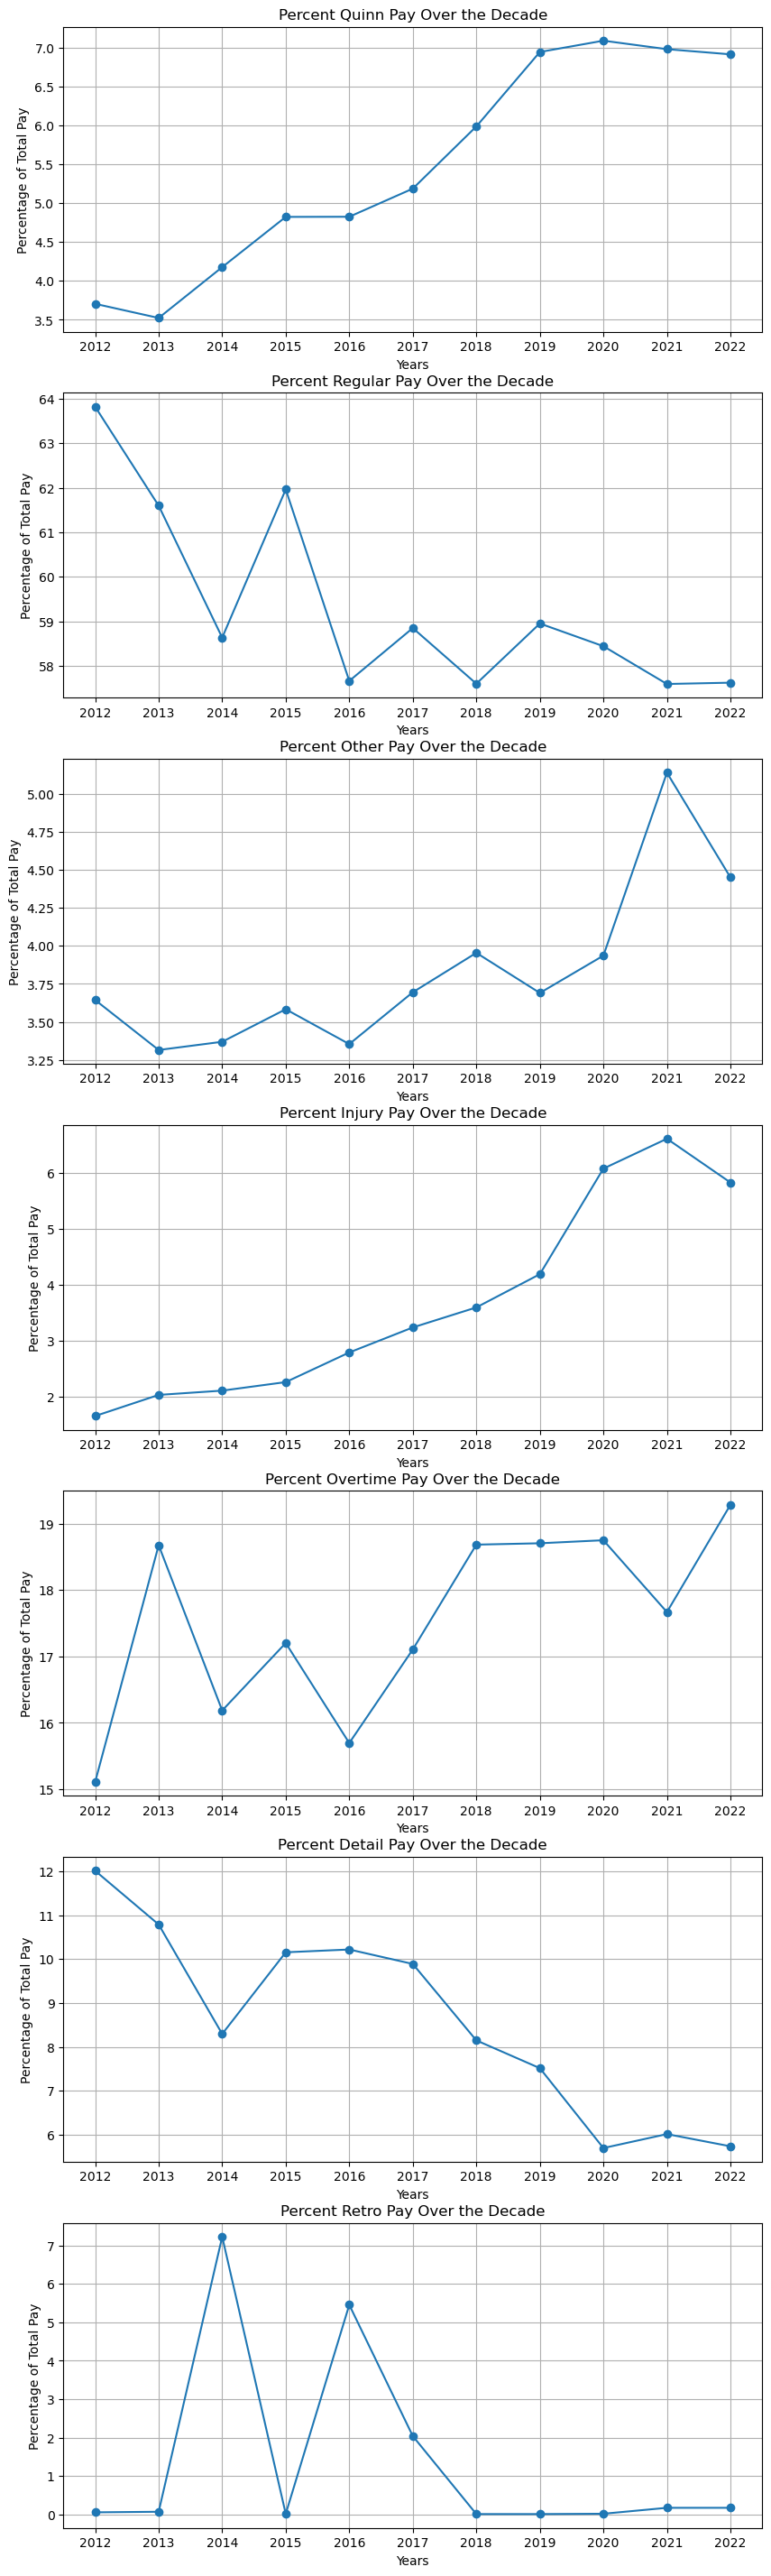

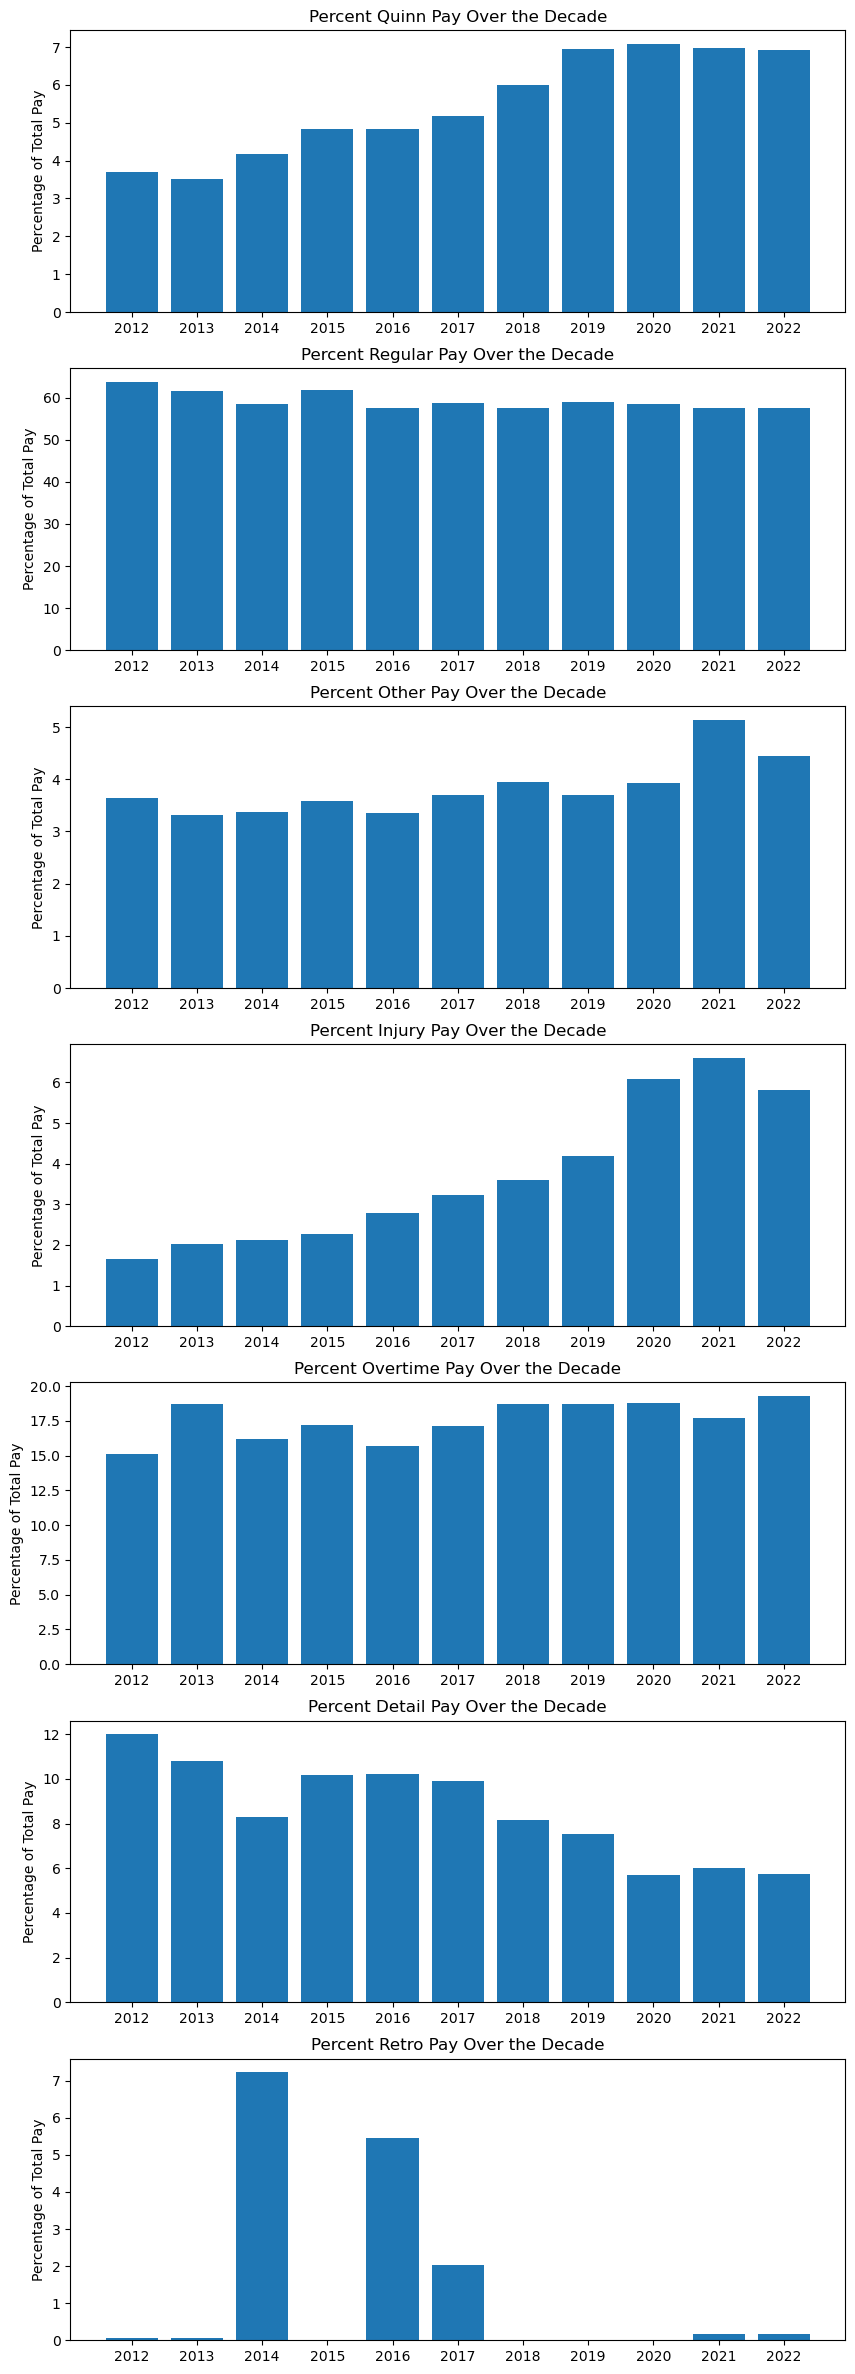

In [94]:
from matplotlib.ticker import FuncFormatter
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
percentQuinn = [percent2012Quinn, percent2013Quinn, percent2014Quinn, percent2015Quinn, percent2016Quinn, percent2017Quinn, percent2018Quinn, percent2019Quinn, percent2020Quinn, percent2021Quinn, percent2022Quinn]
percentRegular = [percent2012Regular, percent2013Regular, percent2014Regular, percent2015Regular, percent2016Regular, percent2017Regular, percent2018Regular, percent2019Regular, percent2020Regular, percent2021Regular, percent2022Regular]
percentOther = [percent2012Other, percent2013Other, percent2014Other, percent2015Other, percent2016Other, percent2017Other, percent2018Other, percent2019Other, percent2020Other, percent2021Other, percent2022Other]
percentInjured = [percent2012Injured, percent2013Injured, percent2014Injured, percent2015Injured, percent2016Injured, percent2017Injured, percent2018Injured, percent2019Injured, percent2020Injured, percent2021Injured, percent2022Injured]
percentOvertime = [percent2012Overtime, percent2013Overtime, percent2014Overtime, percent2015Overtime, percent2016Overtime, percent2017Overtime, percent2018Overtime, percent2019Overtime, percent2020Overtime, percent2021Overtime, percent2022Overtime]
percentDetail = [percent2012Detail, percent2013Detail, percent2014Detail, percent2015Detail, percent2016Detail, percent2017Detail, percent2018Detail, percent2019Detail, percent2020Detail, percent2021Detail, percent2022Detail]
percentRetro = [percent2012Retro, percent2013Retro, percent2014Retro, percent2015Retro, percent2016Retro, percent2017Retro, percent2018Retro, percent2019Retro, percent2020Retro, percent2021Retro, percent2022Retro]

data = [percentQuinn,percentRegular,percentOther,percentInjured,percentOvertime,percentDetail,percentRetro]

subplotTitles = ['Percent Quinn Pay Over the Decade', 'Percent Regular Pay Over the Decade', 'Percent Other Pay Over the Decade', 'Percent Injury Pay Over the Decade',
                 'Percent Overtime Pay Over the Decade', 'Percent Detail Pay Over the Decade', 'Percent Retro Pay Over the Decade']
fig, axes = plt.subplots(7, 1, figsize=(10, 36))


for i in range(7):
    axes[i].plot(years, data[i], marker='o', linestyle='-')
    axes[i].set_title(subplotTitles[i])
    axes[i].set_ylabel('Percentage of Total Pay')
    axes[i].grid(True)
    axes[i].set_xlabel("Years")

fig, axes = plt.subplots(7, 1, figsize=(10, 30))
for i in range(7):
    axes[i].bar(years, data[i])
    axes[i].set_ylabel('Percentage of Total Pay')
    axes[i].set_title(subplotTitles[i])

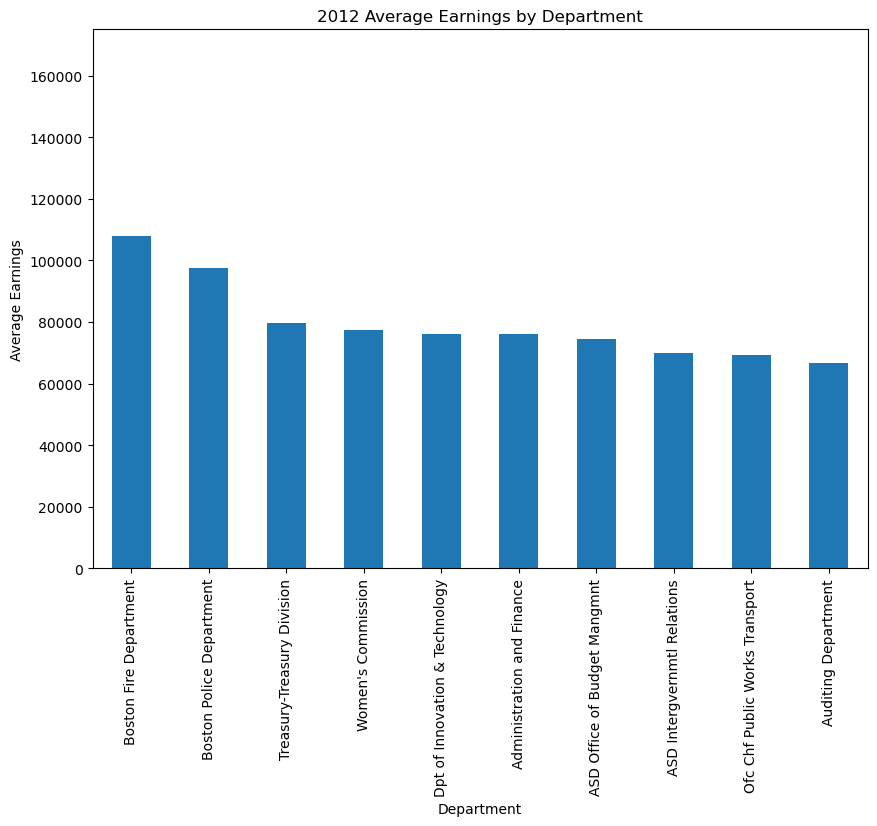

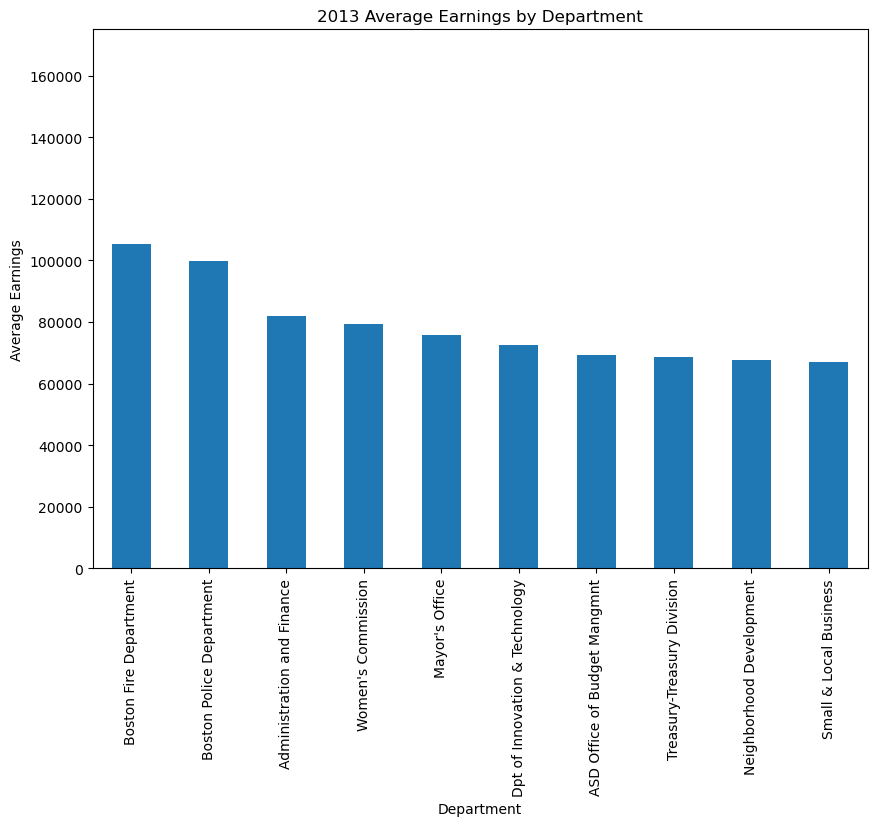

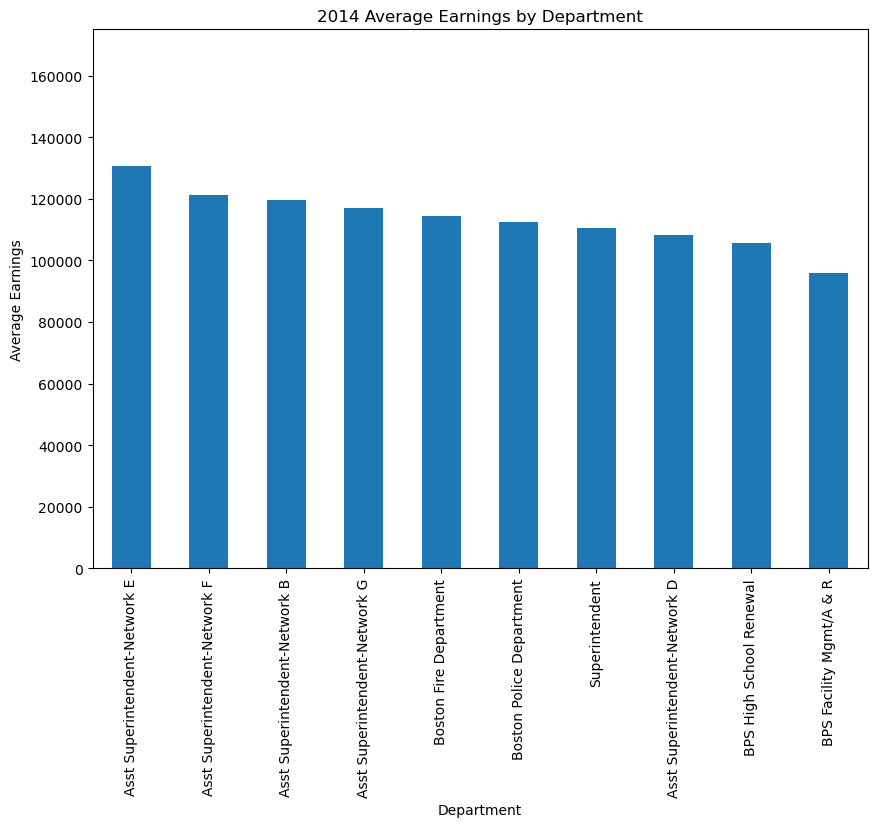

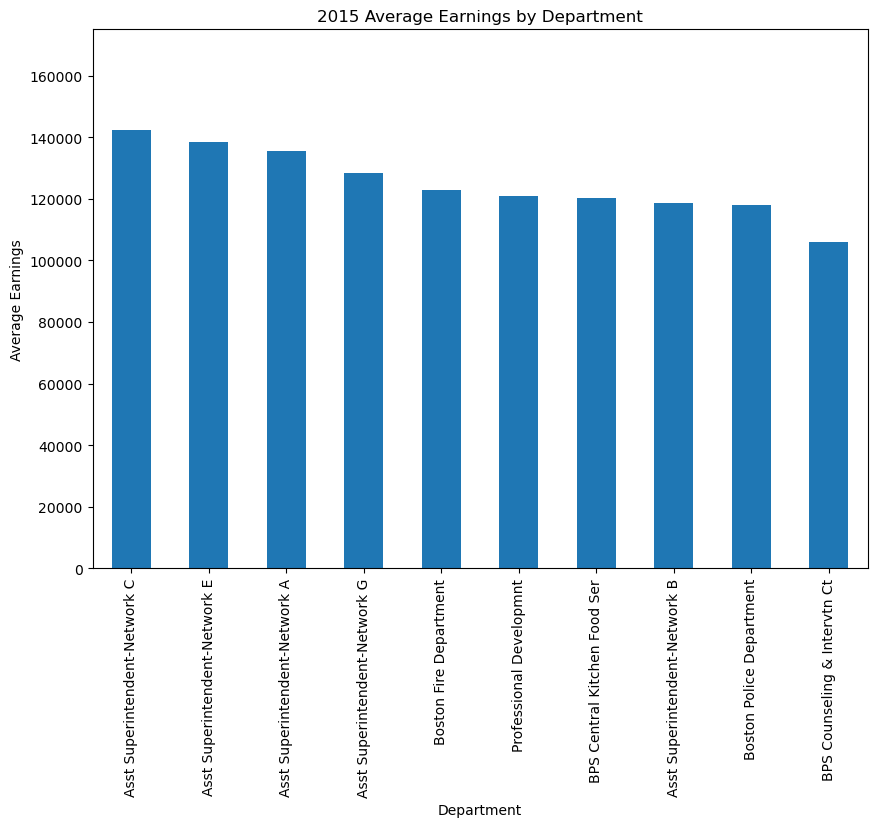

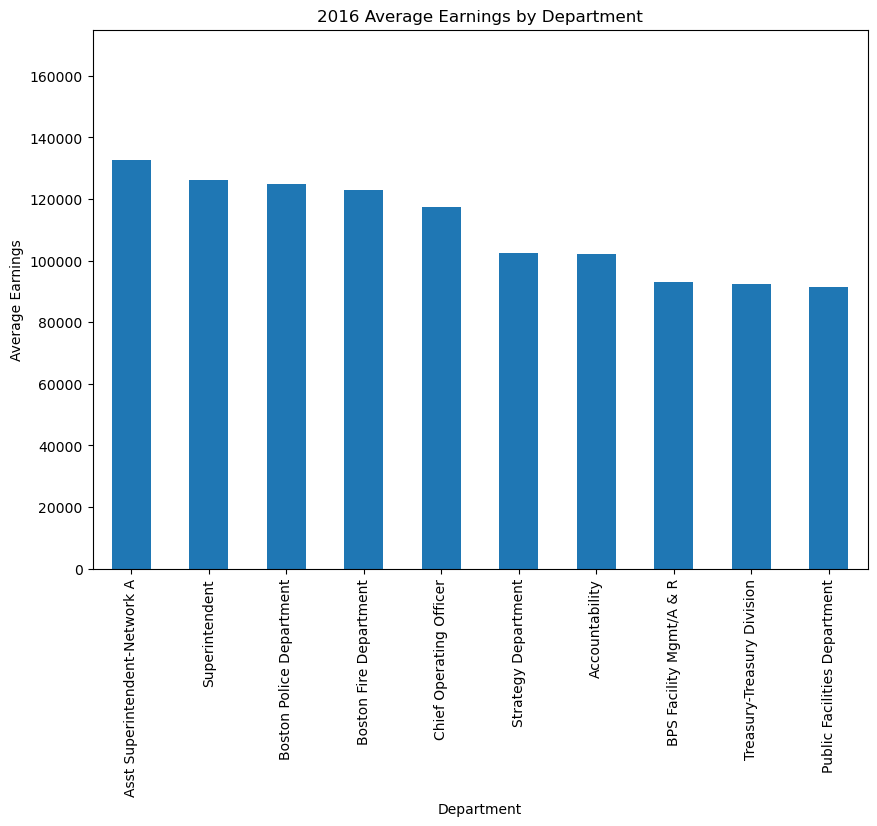

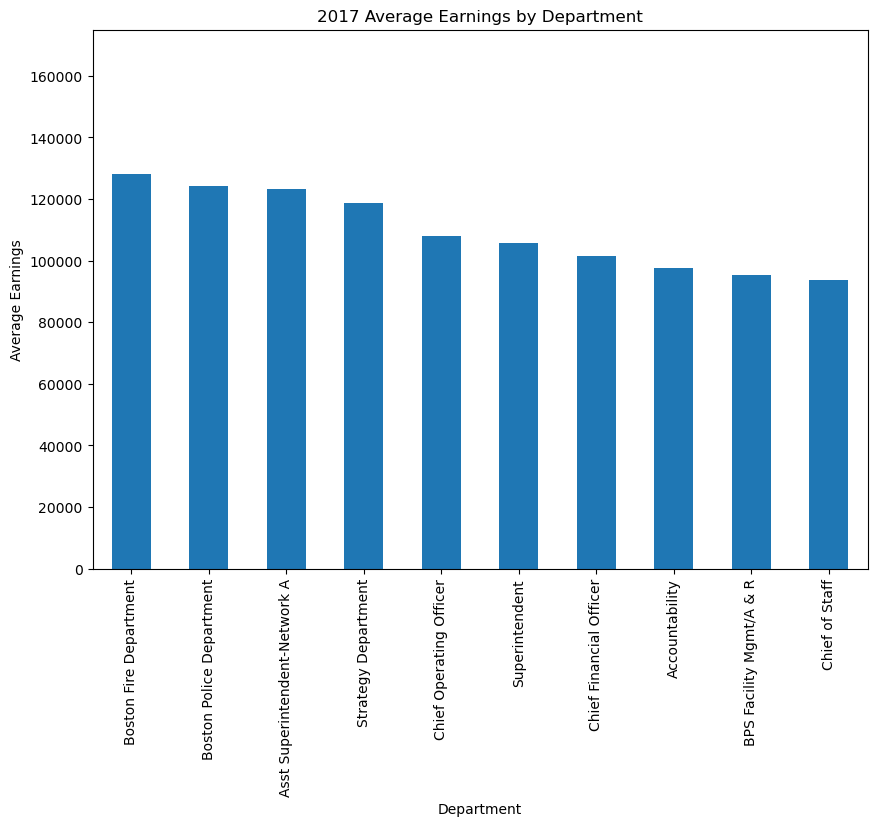

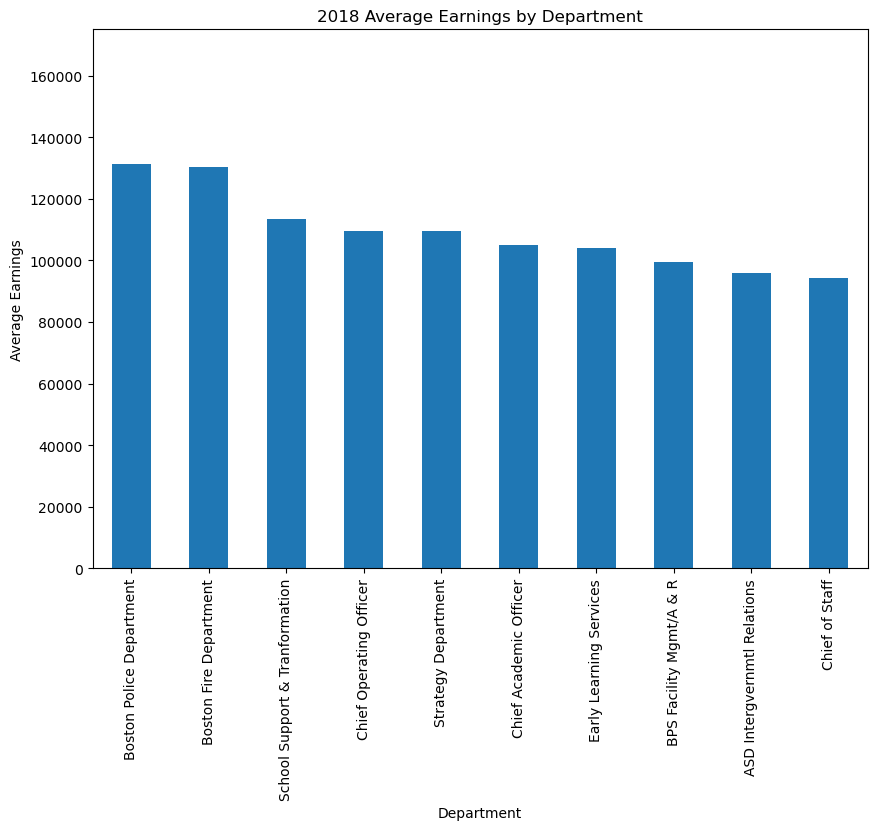

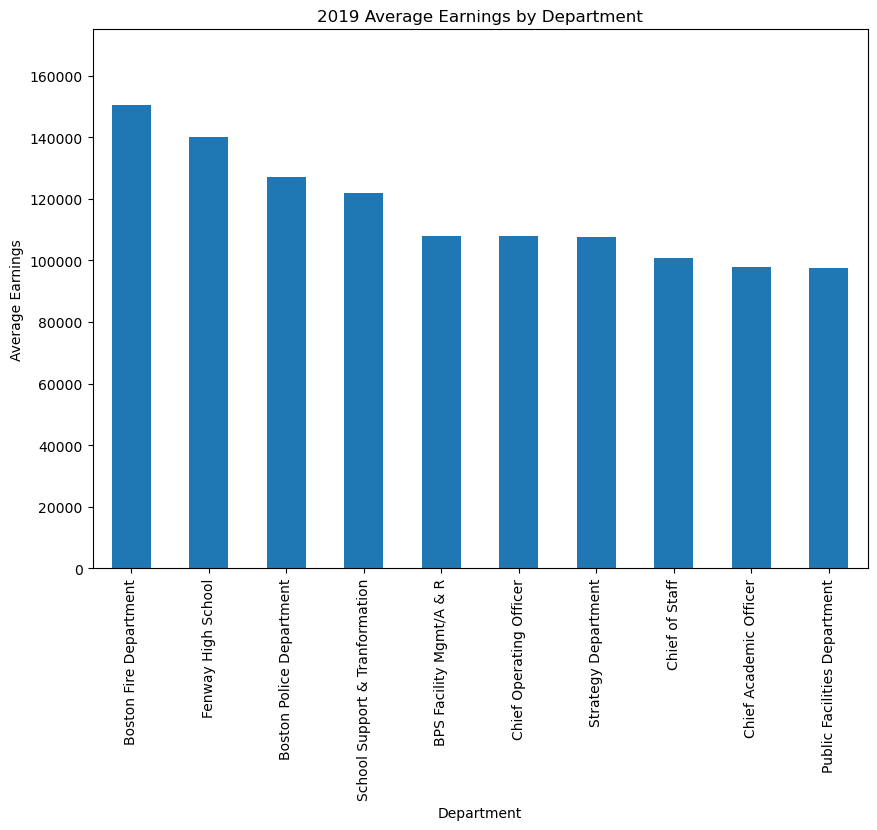

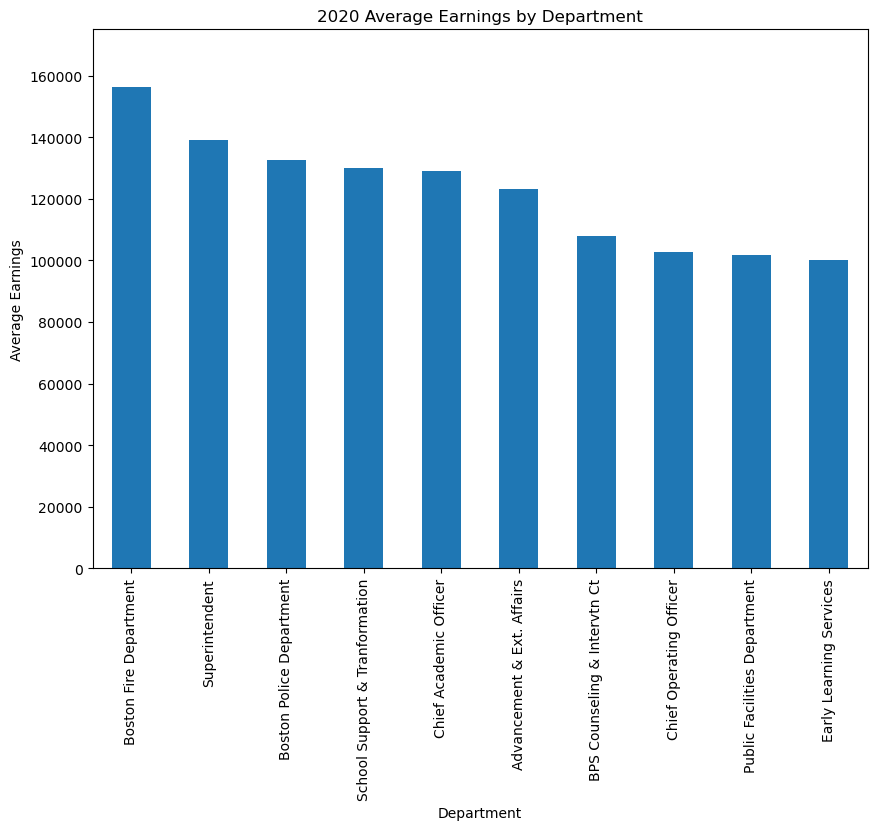

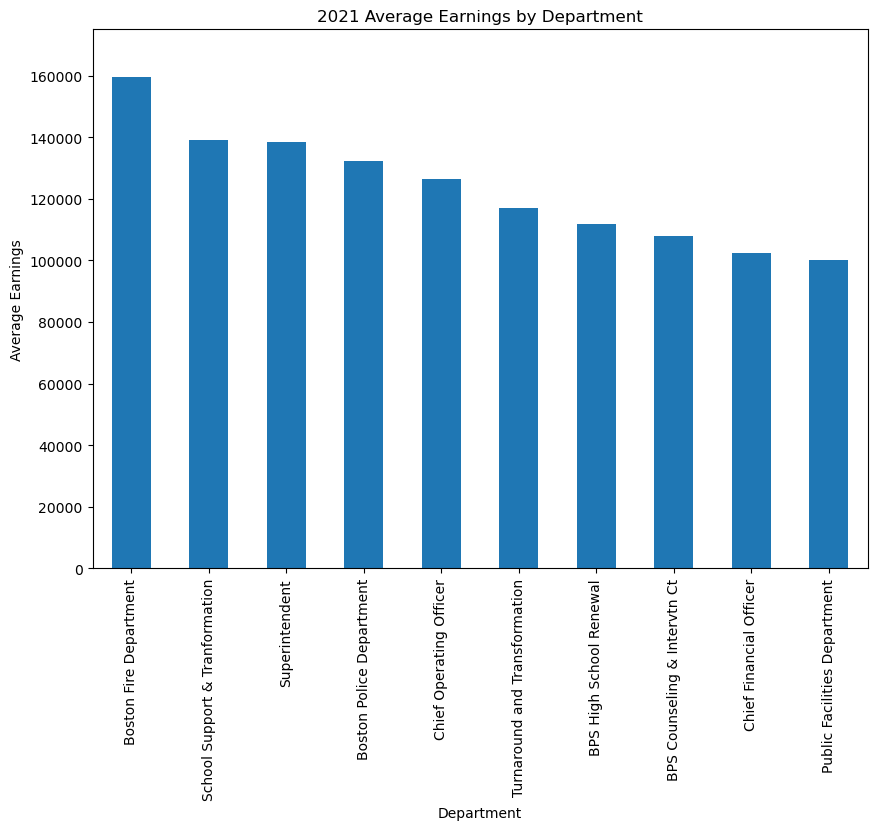

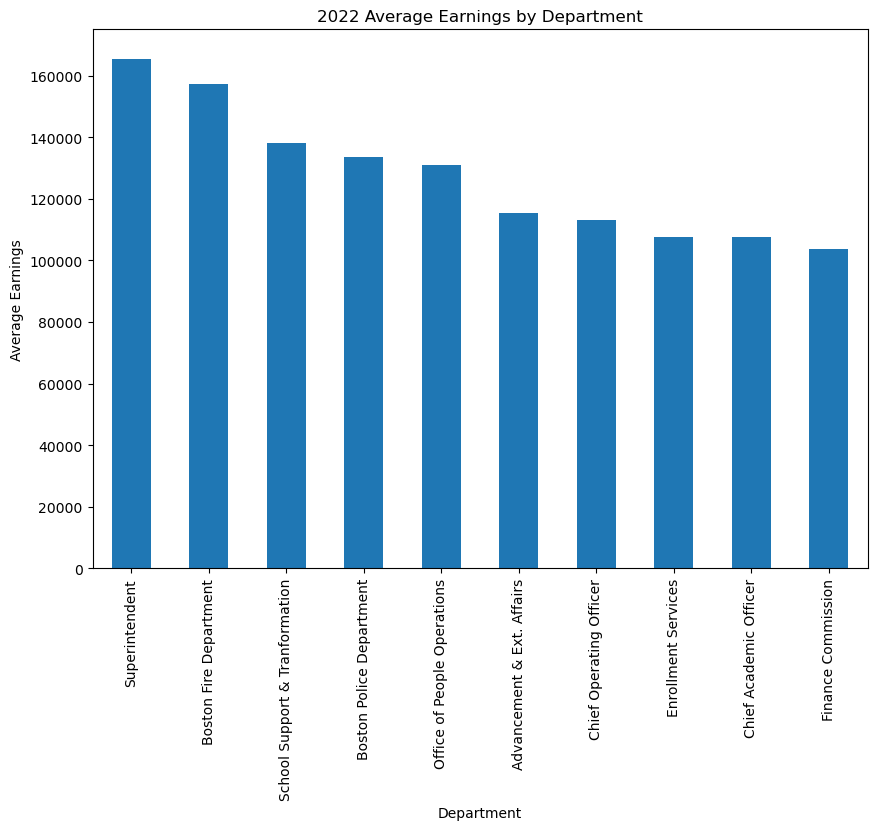

In [82]:
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
data = [departments2012, departments2013, departments2014, departments2015, departments2016, departments2017, departments2018, departments2019, departments2020, departments2021, departments2022]


for i, year in enumerate(years):
    plt.figure(figsize=(10, 7))
    ax = plt.subplot(111)
    ax.set_ylim(0, 175000)
    data[i].plot(kind='bar', ax=ax)
    
    ax.set_ylabel('Average Earnings')
    ax.set_xlabel('Department')
    ax.set_title(f'{year} Average Earnings by Department')
    plt.show()
    plt.close()
    

In [83]:
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
dataInjury = [num2012Injury, num2013Injury, num2014Injury, num2015Injury, num2016Injury, num2017Injury, num2018Injury, num2019Injury, num2020Injury, num2021Injury, num2022Injury]
dataOvertime = [num2012Overtime, num2013Overtime, num2014Overtime, num2015Overtime, num2016Overtime, num2017Overtime, num2018Overtime, num2019Overtime, num2020Overtime, num2021Overtime, num2022Overtime]
dataRetro = [num2012Retro, num2013Retro, num2014Retro, num2015Retro, num2016Retro, num2017Retro, num2018Retro, num2019Retro, num2020Retro, num2021Retro, num2022Retro]
dataQuinn = [num2012Quinn, num2013Quinn, num2014Quinn, num2015Quinn, num2016Quinn, num2017Quinn, num2018Quinn, num2019Quinn, num2020Quinn, num2021Quinn, num2022Quinn]
dataOther = [num2012Other, num2013Other, num2014Other, num2015Other, num2016Other, num2017Other, num2018Other, num2019Other, num2020Other, num2021Other, num2022Other]
dataDetail = [num2012Detail, num2013Detail, num2014Detail, num2015Detail, num2016Detail, num2017Detail, num2018Detail, num2019Detail, num2020Detail, num2021Detail, num2022Detail]

C:\Users\opres\AppData\Local\Temp\ipykernel_2608\2597856625.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])


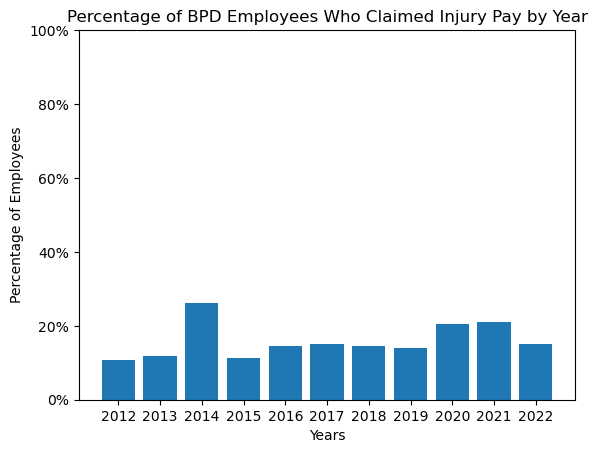

0.15910894378947824



In [84]:
plt.bar(years, dataInjury)
plt.xlabel('Years')
plt.ylabel('Percentage of Employees')
plt.ylim(0,1.0)
plt.title('Percentage of BPD Employees Who Claimed Injury Pay by Year')
plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])
plt.show()
def Average(lst): 
    return sum(lst) / len(lst) 
 
average = Average(dataInjury) 
print(average)
print()

C:\Users\opres\AppData\Local\Temp\ipykernel_2608\2637214936.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])


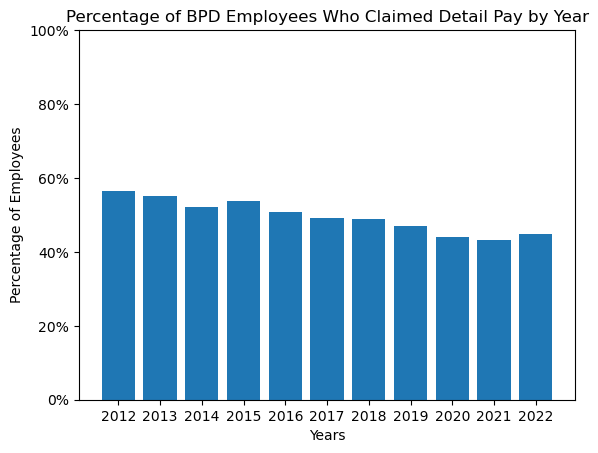

In [85]:
plt.bar(years, dataDetail)
plt.xlabel('Years')
plt.ylabel('Percentage of Employees')
plt.ylim(0,1.0)
plt.title('Percentage of BPD Employees Who Claimed Detail Pay by Year')
plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])
plt.show()

C:\Users\opres\AppData\Local\Temp\ipykernel_2608\2128471195.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])


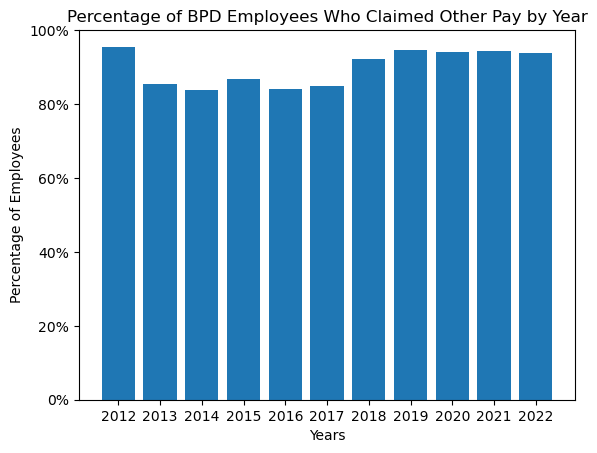

In [86]:
plt.bar(years, dataOther)
plt.xlabel('Years')
plt.ylabel('Percentage of Employees')
plt.ylim(0,1.0)
plt.title('Percentage of BPD Employees Who Claimed Other Pay by Year')
plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])
plt.show()

C:\Users\opres\AppData\Local\Temp\ipykernel_2608\2316528086.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])


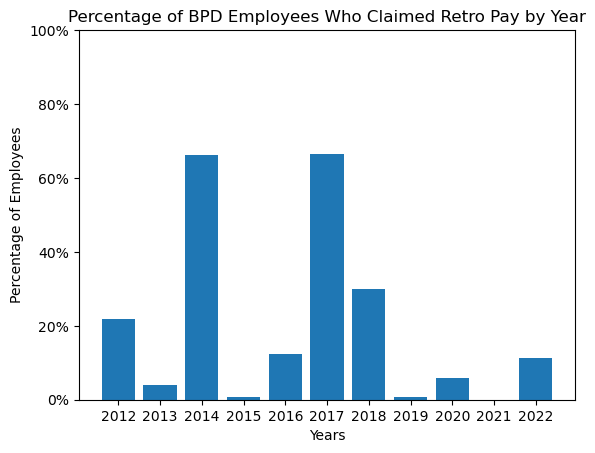

In [87]:
plt.bar(years, dataRetro)
plt.xlabel('Years')
plt.ylabel('Percentage of Employees')
plt.ylim(0,1.0)
plt.title('Percentage of BPD Employees Who Claimed Retro Pay by Year')
plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])
plt.show()

C:\Users\opres\AppData\Local\Temp\ipykernel_2608\979767618.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])


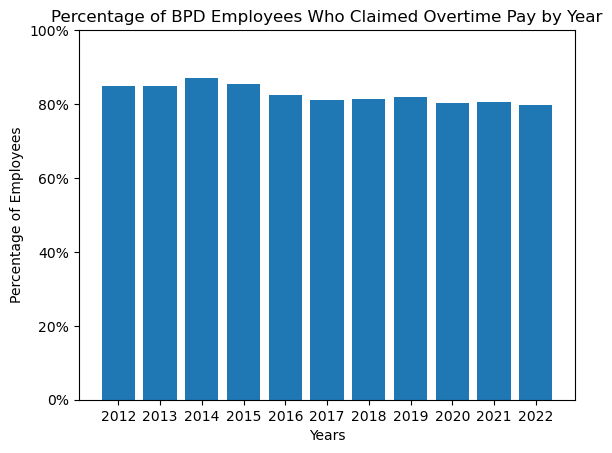

In [88]:
plt.bar(years, dataOvertime)
plt.xlabel('Years')
plt.ylabel('Percentage of Employees')
plt.ylim(0,1.0)
plt.title('Percentage of BPD Employees Who Claimed Overtime Pay by Year')
plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])
plt.show()

C:\Users\opres\AppData\Local\Temp\ipykernel_2608\276256886.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])


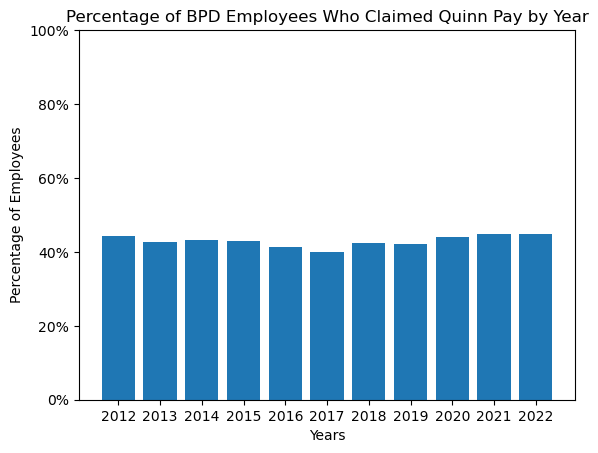

In [89]:
plt.bar(years, dataQuinn)
plt.xlabel('Years')
plt.ylabel('Percentage of Employees')
plt.ylim(0,1.0)
plt.title('Percentage of BPD Employees Who Claimed Quinn Pay by Year')
plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])
plt.show()

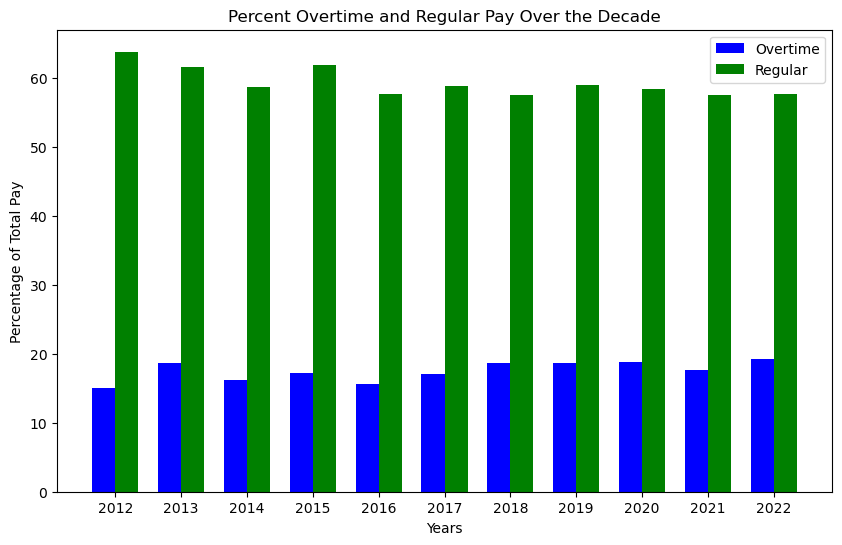

In [90]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Bar positions
bar_positions1 = [i - bar_width/2 for i in range(len(years))]
bar_positions2 = [i + bar_width/2 for i in range(len(years))]

# Plotting 'Overtime' and 'Regular' with overlapping bars
ax.bar(bar_positions1, percentOvertime, bar_width, label='Overtime', color='blue')
ax.bar(bar_positions2, percentRegular, bar_width, label='Regular', color='green')

# Set labels and title
ax.set_xlabel('Years')
ax.set_ylabel('Percentage of Total Pay')
ax.set_title('Percent Overtime and Regular Pay Over the Decade')
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years)
ax.legend()

# Show the plot
plt.show()



In [91]:
overtimeTotals = [total2015Overtime, total2016Overtime, total2017Overtime, total2018Overtime, total2019Overtime, total2020Overtime, total2021Overtime, total2022Overtime]
print(overtimeTotals)

[61608144.93, 60989917.25, 66933649.86999999, 77855435.97999999, 77764302.50999999, 78057696.23, 72222785.03, 78265402.51]


In [92]:
injuryTotals = [total2015Injured, total2016Injured, total2017Injured,total2018Injured, total2019Injured, total2020Injured, total2021Injured, total2022Injured]
print(injuryTotals)


[8095216.93, 10838924.379999999, 12661907.719999999, 14971892.08, 17404626.34, 25272751.17, 26994382.02, 23628467.04]
